In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기본 폰트 설정
plt.rc("font", family="Malgun Gothic")
# '-' 기호 표시 설정
plt.rc("axes", unicode_minus=False)
# 선명도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
# 스타일 변경
plt.style.use("fivethirtyeight")

In [2]:
data = "data/seoul-covid19_6_30_.csv"
data

'data/seoul-covid19_6_30_.csv'

In [3]:
df = pd.read_csv(data)
df.shape

(1321, 7)

In [4]:
# 데이터타입 날짜형태로 변환

df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]]

,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30
...,...,...
1316,1.31.,2020-01-31
1317,1.30.,2020-01-30
1318,1.30.,2020-01-30
1319,1.30.,2020-01-30


In [5]:
# 월만 추출

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].head()

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6


In [6]:
# 해당 연도의 몇 번째 주인가?

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

<ipython-input-6-898aa8597102>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


In [7]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])

In [8]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,06-30
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,06-30
...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,01-31
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


## 접촉력

In [9]:
pd.DataFrame(df['접촉력'].value_counts().head(20))

,접촉력
해외 접촉 추정,280
이태원 클럽 관련,139
리치웨이 관련,119
확인 중,99
구로구 콜센터 관련,60
요양시설 관련,43
양천구 운동시설 관련,43
구로구 교회 관련,41
확인중,39
타시도 확진자 접촉,38


In [10]:
df['접촉력'].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

In [11]:
# '확인'이 들어가는 접촉력만

df.loc[df['접촉력'].str.contains('확인'), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [12]:
# '확인중' 을 '확인 중' 으로 변경

df.loc[df['접촉력'].str.contains('확인'),'접촉력'] = '확인 중'
df.loc[df['접촉력'].str.contains('확인'),'접촉력'].unique()

array(['확인 중'], dtype=object)

<AxesSubplot:>

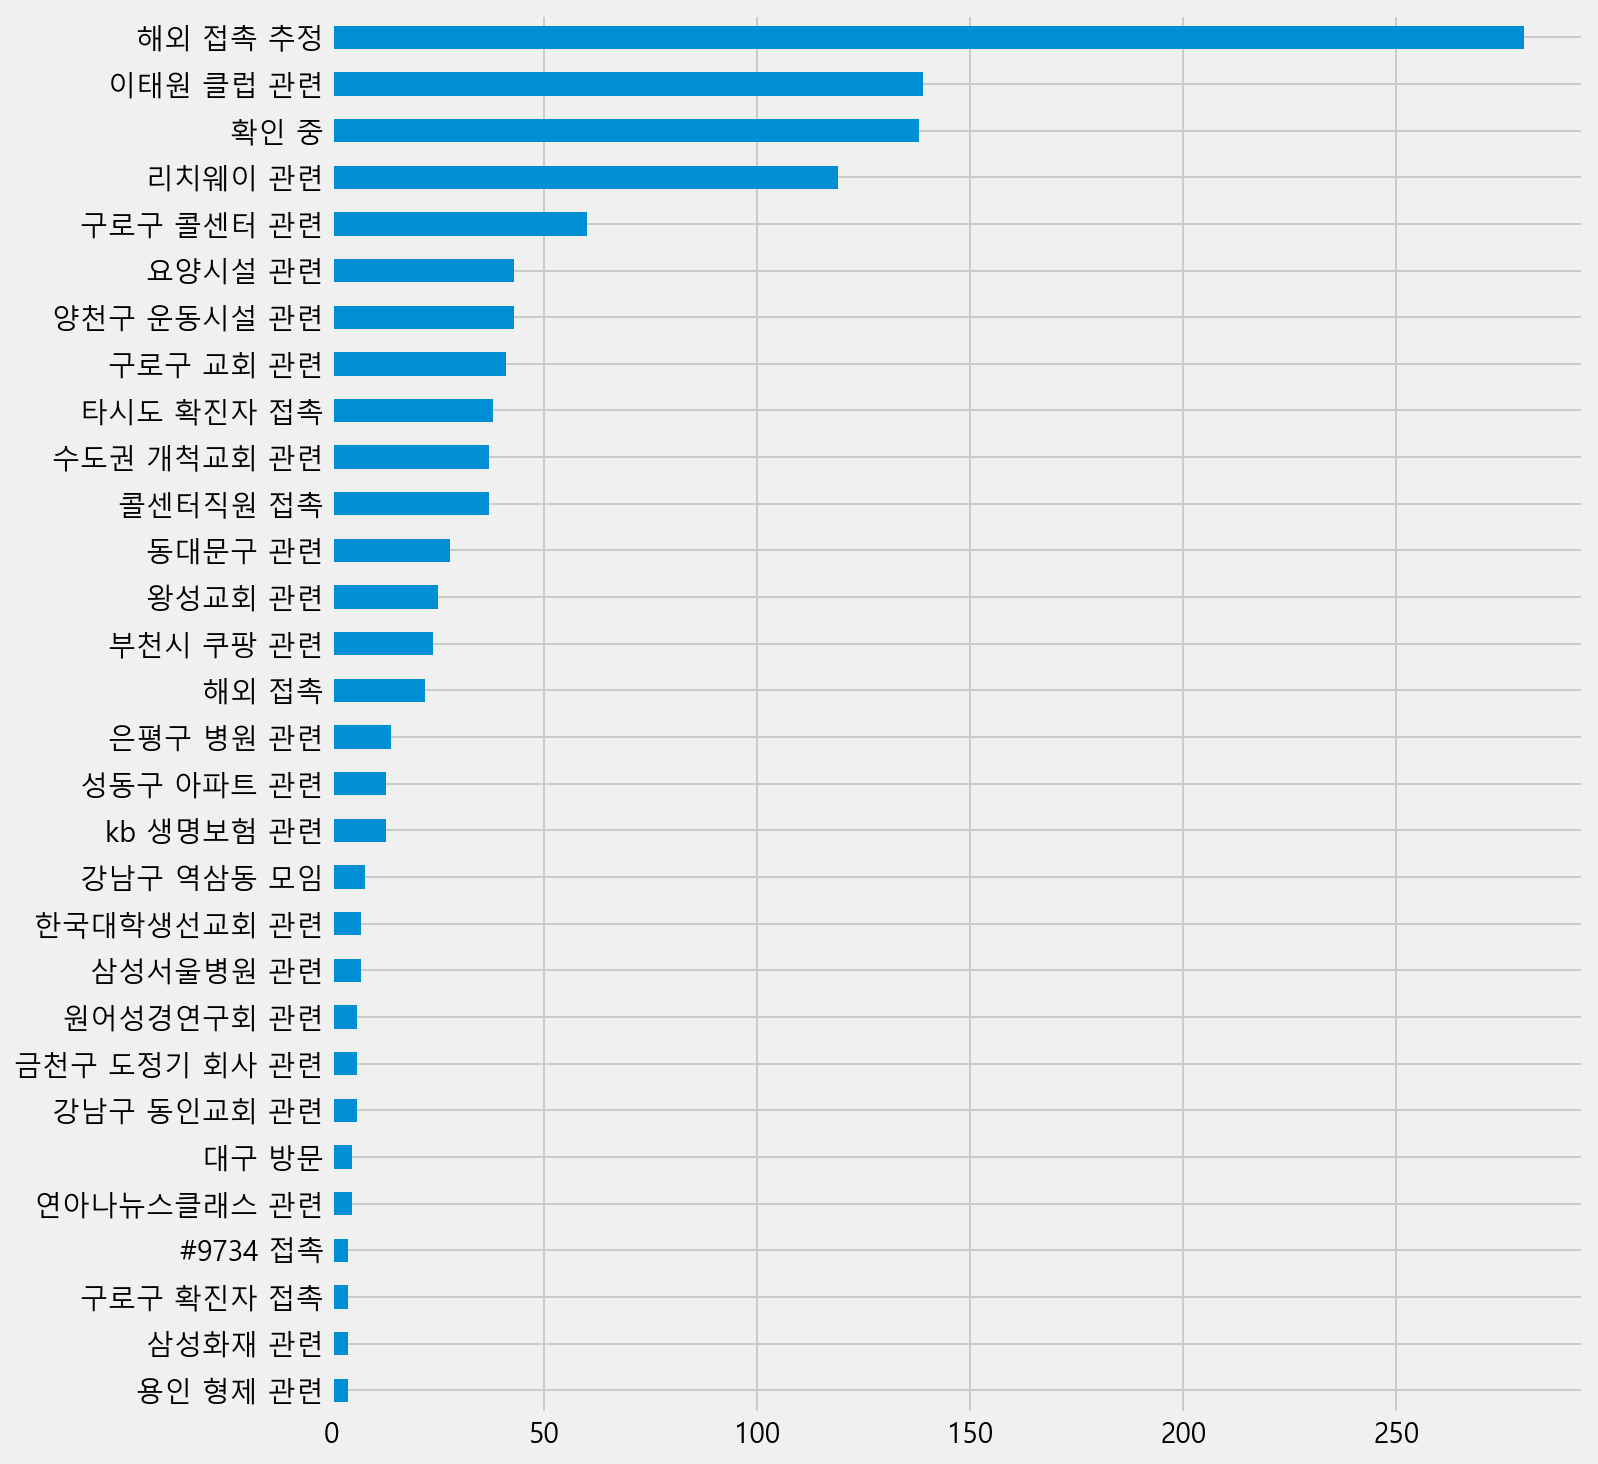

In [13]:
contact_count = df['접촉력'].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize = (10, 12))

In [14]:
# 상위 15개

top_contact = contact_count_top.tail(15)
top_contact.index

Index(['해외 접촉', '부천시 쿠팡 관련', '왕성교회 관련', '동대문구 관련', '콜센터직원 접촉', '수도권 개척교회 관련',
       '타시도 확진자 접촉', '구로구 교회 관련', '양천구 운동시설 관련', '요양시설 관련', '구로구 콜센터 관련',
       '리치웨이 관련', '확인 중', '이태원 클럽 관련', '해외 접촉 추정'],
      dtype='object')

In [15]:
top_group = df[df['접촉력'].isin(top_contact.index)]
top_group

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,06-30
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29
...,...,...,...,...,...,...,...,...,...,...,...
1312,9,19,2.5.,송파구,싱가포르,해외 접촉,서울의료원(퇴원),2020-02-05,2,6,02-05
1313,8,13,2.2.,인천시,우한 교민,해외 접촉,국립중앙의료원(퇴원),2020-02-02,2,5,02-02
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,01-30


In [16]:
# 접촉력, 월별 빈도수

top_group.groupby(['접촉력','월'])['연번'].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


## 이태원 클럽 관련

In [17]:
df[df['접촉력'].str.contains('이태원') & (df['월']==6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01


## 감염경로 불명

In [18]:
# '접촉력' 이 '확인 중' 인 데이터

df_unknown = df[df['접촉력'] == '확인 중']
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29


<AxesSubplot:xlabel='월,주'>

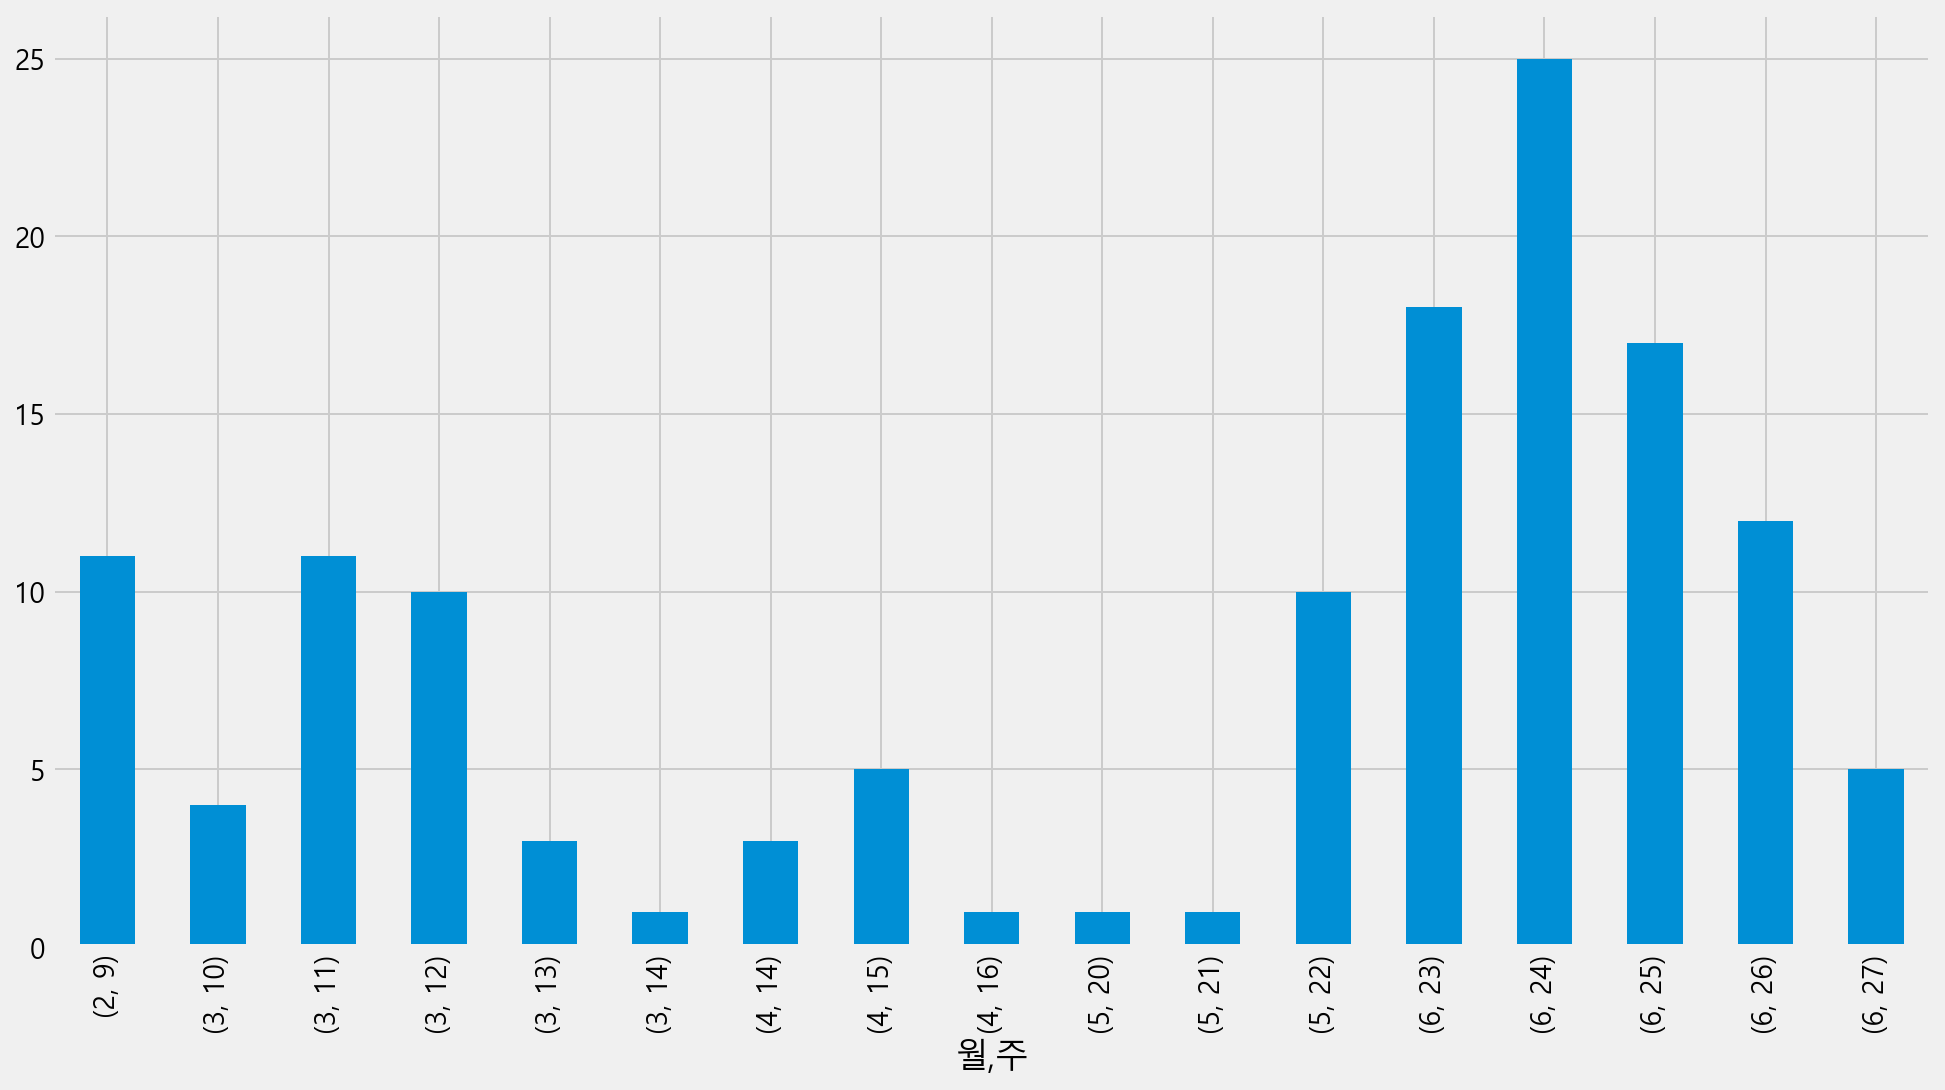

In [19]:
unknown_weekly_case = df_unknown.groupby(['월','주'])['연번'].count()
unknown_weekly_case.plot.bar(figsize = (15,8))

In [20]:
all_weekly_case = df['주'].value_counts().to_frame()
all_weekly_case.columns = ['전체확진수']
all_weekly_case.head()

,전체확진수
23,134
14,128
24,125
11,124
25,106


In [21]:
unkown_weekl_case = df_unknown['주'].value_counts().to_frame()
unkown_weekl_case.columns = ['불명확진수']
unkown_weekl_case.head()

,불명확진수
24,25
23,18
25,17
26,12
11,11


In [22]:
unkown_case = all_weekly_case.merge(unkown_weekl_case, left_index=True, right_index=True)
unkown_case = unkown_case.sort_index()
unkown_case

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


<AxesSubplot:>

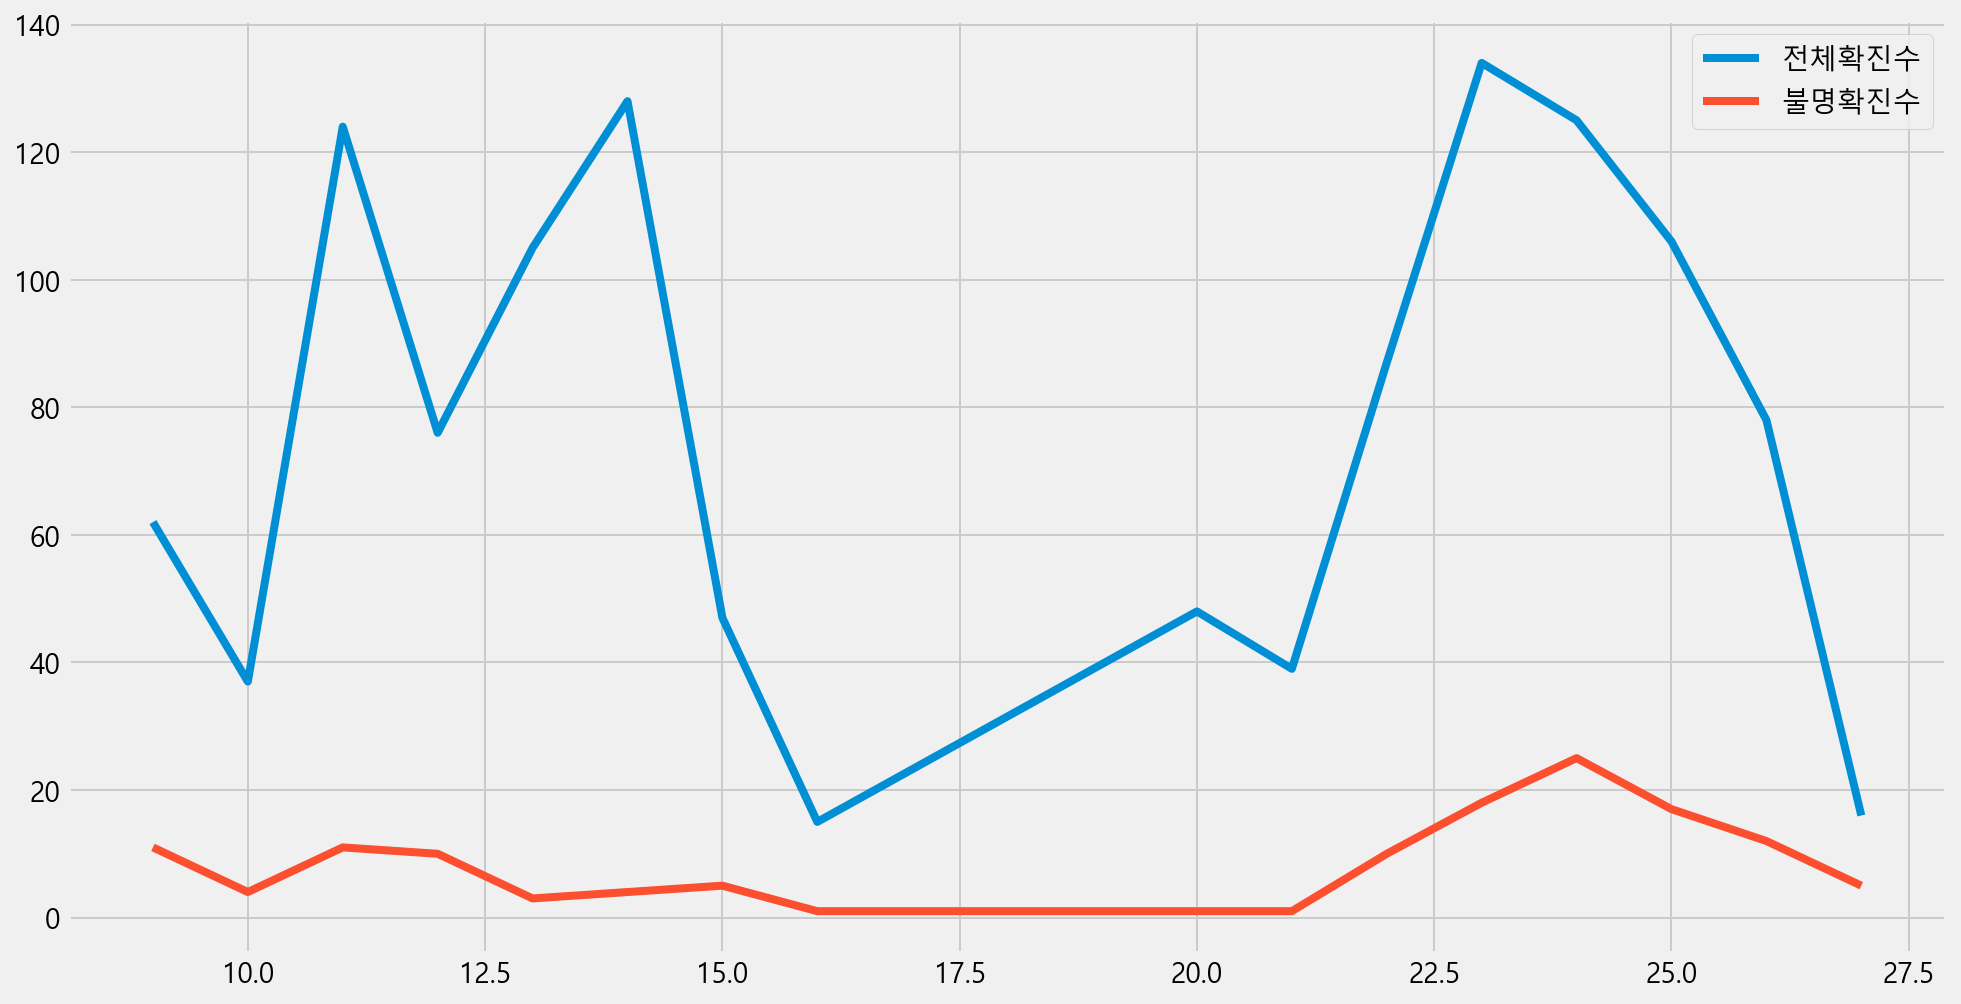

In [23]:
unkown_case.plot(figsize = (15,8))

In [24]:
unkown_case['확인중비율'] = (unkown_case['불명확진수'] / unkown_case['전체확진수']) * 100
unkown_case

,전체확진수,불명확진수,확인중비율
9,62,11,17.741935
10,37,4,10.810811
11,124,11,8.870968
12,76,10,13.157895
13,105,3,2.857143
14,128,4,3.125000
15,47,5,10.638298
16,15,1,6.666667
20,48,1,2.083333
21,39,1,2.564103


<AxesSubplot:>

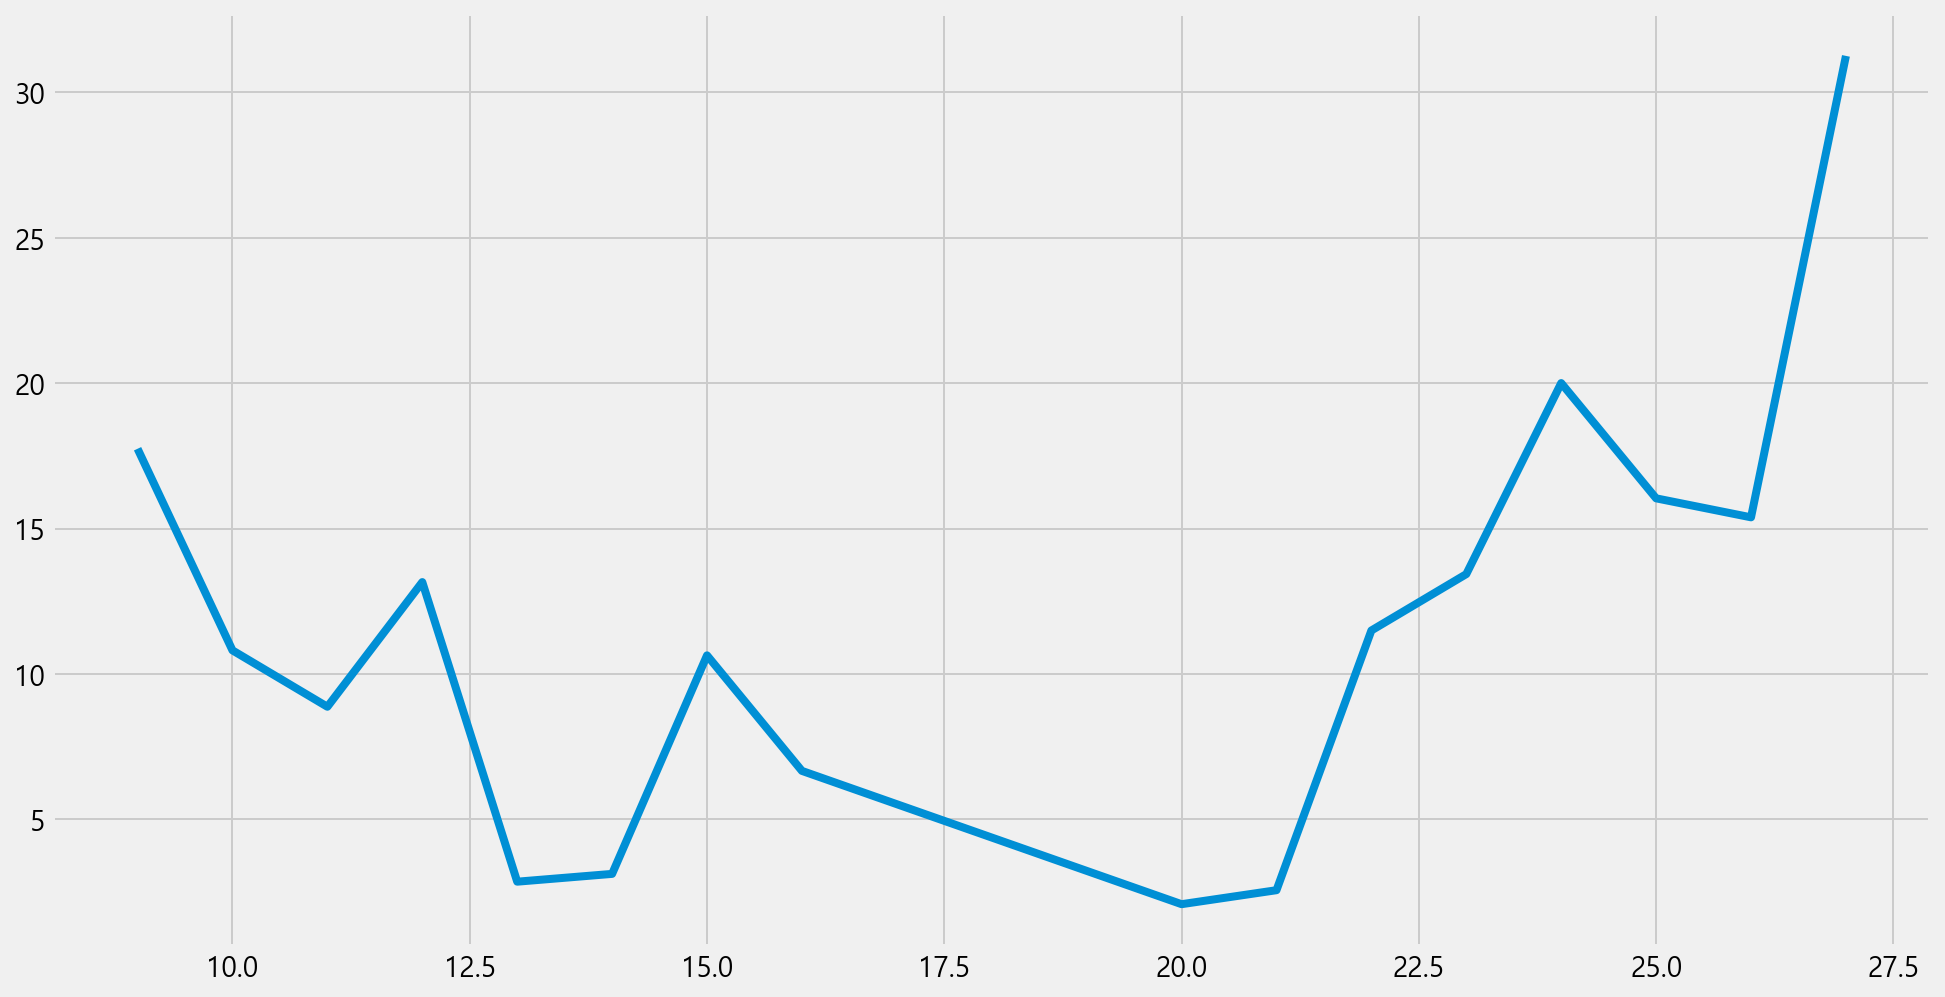

In [25]:
unkown_case['확인중비율'].plot(figsize = (15,8))

## 가장 많은 전파가 일어난 번호

In [26]:
# 문자열 변환

import re

re.sub("[0-9]", "", "7265 접촉(추정)")

' 접촉(추정)'

In [27]:
re.sub("[^0-9]", "", "7265 접촉(추정)")

'7265'

In [28]:
# 문자 제거 함수

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("7265 접촉(추정)")

'7265'

In [29]:
# map을 통해 접촉번호 구하기

df['접촉번호'] = df['접촉력'].map(get_number)
contact = df['접촉번호'].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,1236
1,6,4
2,9734,4
3,780,3
4,8271,3


In [30]:
# 상위 10개 번호만

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,6,4
2,9734,4
3,780,3
4,8271,3
5,8486,3
6,8791,3
7,9287,2
8,794,2
9,8669,2
10,6832,2


In [31]:
top_contact_no = df_contact['index']
top_contact_no

1        6
2     9734
3      780
4     8271
5     8486
6     8791
7     9287
8      794
9     8669
10    6832
Name: index, dtype: object

In [32]:
df[df['접촉번호'].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,접촉번호
761,560,10265,4.05.,송파구,-,#9287 접촉,서울의료원(퇴원),2020-04-05,4,14,04-05,9287
808,513,10115,4.3.,강남구,-,#9287 접촉,서울성모병원(퇴원),2020-04-03,4,14,04-03,9287
830,491,10021,4.01.,영등포구,-,#8271 접촉,서울의료원(퇴원),2020-04-01,4,14,04-01,8271
839,482,9939,4.01.,동작구,-,#8669 접촉,보라매병원(퇴원),2020-04-01,4,14,04-01,8669
848,473,9870,3.31.,수원시,-,#9734 접촉,타시도 이관(사망),2020-03-31,3,14,03-31,9734
849,472,9800,3.31.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-31,3,14,03-31,9734
874,447,9725,3.30.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-30,3,14,03-30,9734
879,442,9706,3.30.,서초구,-,#9734 접촉,서울의료원(퇴원),2020-03-30,3,14,03-30,9734
918,403,9571,3.28.,동작구,-,#8669 접촉,보라매병원(퇴원),2020-03-28,3,13,03-28,8669
940,381,9427,3.27.,중랑구,-,#8791 접촉,서울의료원(퇴원),2020-03-27,3,13,03-27,8791


## 조치사항

In [33]:
df['조치사항'].value_counts()

서울의료원(퇴원)      339
보라매병원(퇴원)      186
서남병원(퇴원)       176
생활치료센터(퇴원)      79
서남병원            67
              ... 
서울삼성병원(퇴원)       1
신촌세브란스병원         1
생활치료시설(퇴원)       1
중앙대학교병원          1
경희대학교병원(퇴원)      1
Name: 조치사항, Length: 75, dtype: int64

## 퇴원, 사망여부

In [34]:
df['퇴원'] = df['조치사항'].str.contains('퇴원')
df['사망'] = df['조치사항'].str.contains("사망")
df['병원'] = df['조치사항'].str.replace('\(퇴원\)', "")
df['병원'] = df['병원'].str.replace('\(사망\)', "")

In [35]:
df['퇴원'].value_counts()

True     1026
False     295
Name: 퇴원, dtype: int64

In [36]:
df['퇴원'].value_counts(normalize = True)

True     0.776684
False    0.223316
Name: 퇴원, dtype: float64

In [37]:
df['사망'].value_counts()

False    1314
True        7
Name: 사망, dtype: int64

In [38]:
df['사망'].value_counts(normalize = True)

False    0.994701
True     0.005299
Name: 사망, dtype: float64

In [39]:
# 가장 오래 입원한 확진자

df[(df['퇴원'] == False) & (df['사망'] == False) & (df['조치사항'].str.contains('타시도') == False)].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,접촉번호,퇴원,사망,병원
519,802,11256,5.27.,강서구,-,부천시 쿠팡 관련,강북삼성병원,2020-05-27,5,22,05-27,,False,False,강북삼성병원
527,794,11242,5.26.,도봉구,-,원어성경연구회 관련,원자력병원,2020-05-26,5,22,05-26,,False,False,원자력병원
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,,False,False,서울삼성병원
573,748,11093,5.19.,서초구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,05-19,,False,False,서울삼성병원
621,700,10941,5.11.,양천구,-,이태원 클럽 관련,서북병원,2020-05-11,5,20,05-11,,False,False,서북병원


## 어느 병원에서 확진자를 가장 많이 치료했는가

In [41]:
df['병원'].describe()

count      1321
unique       44
top       서울의료원
freq        395
Name: 병원, dtype: object

In [45]:
# 병원의 빈도수

hospital_count = df['병원'].value_counts()
hospital_count.head()

서울의료원     395
서남병원      244
보라매병원     240
생활치료센터     88
서북병원       68
Name: 병원, dtype: int64

<AxesSubplot:>

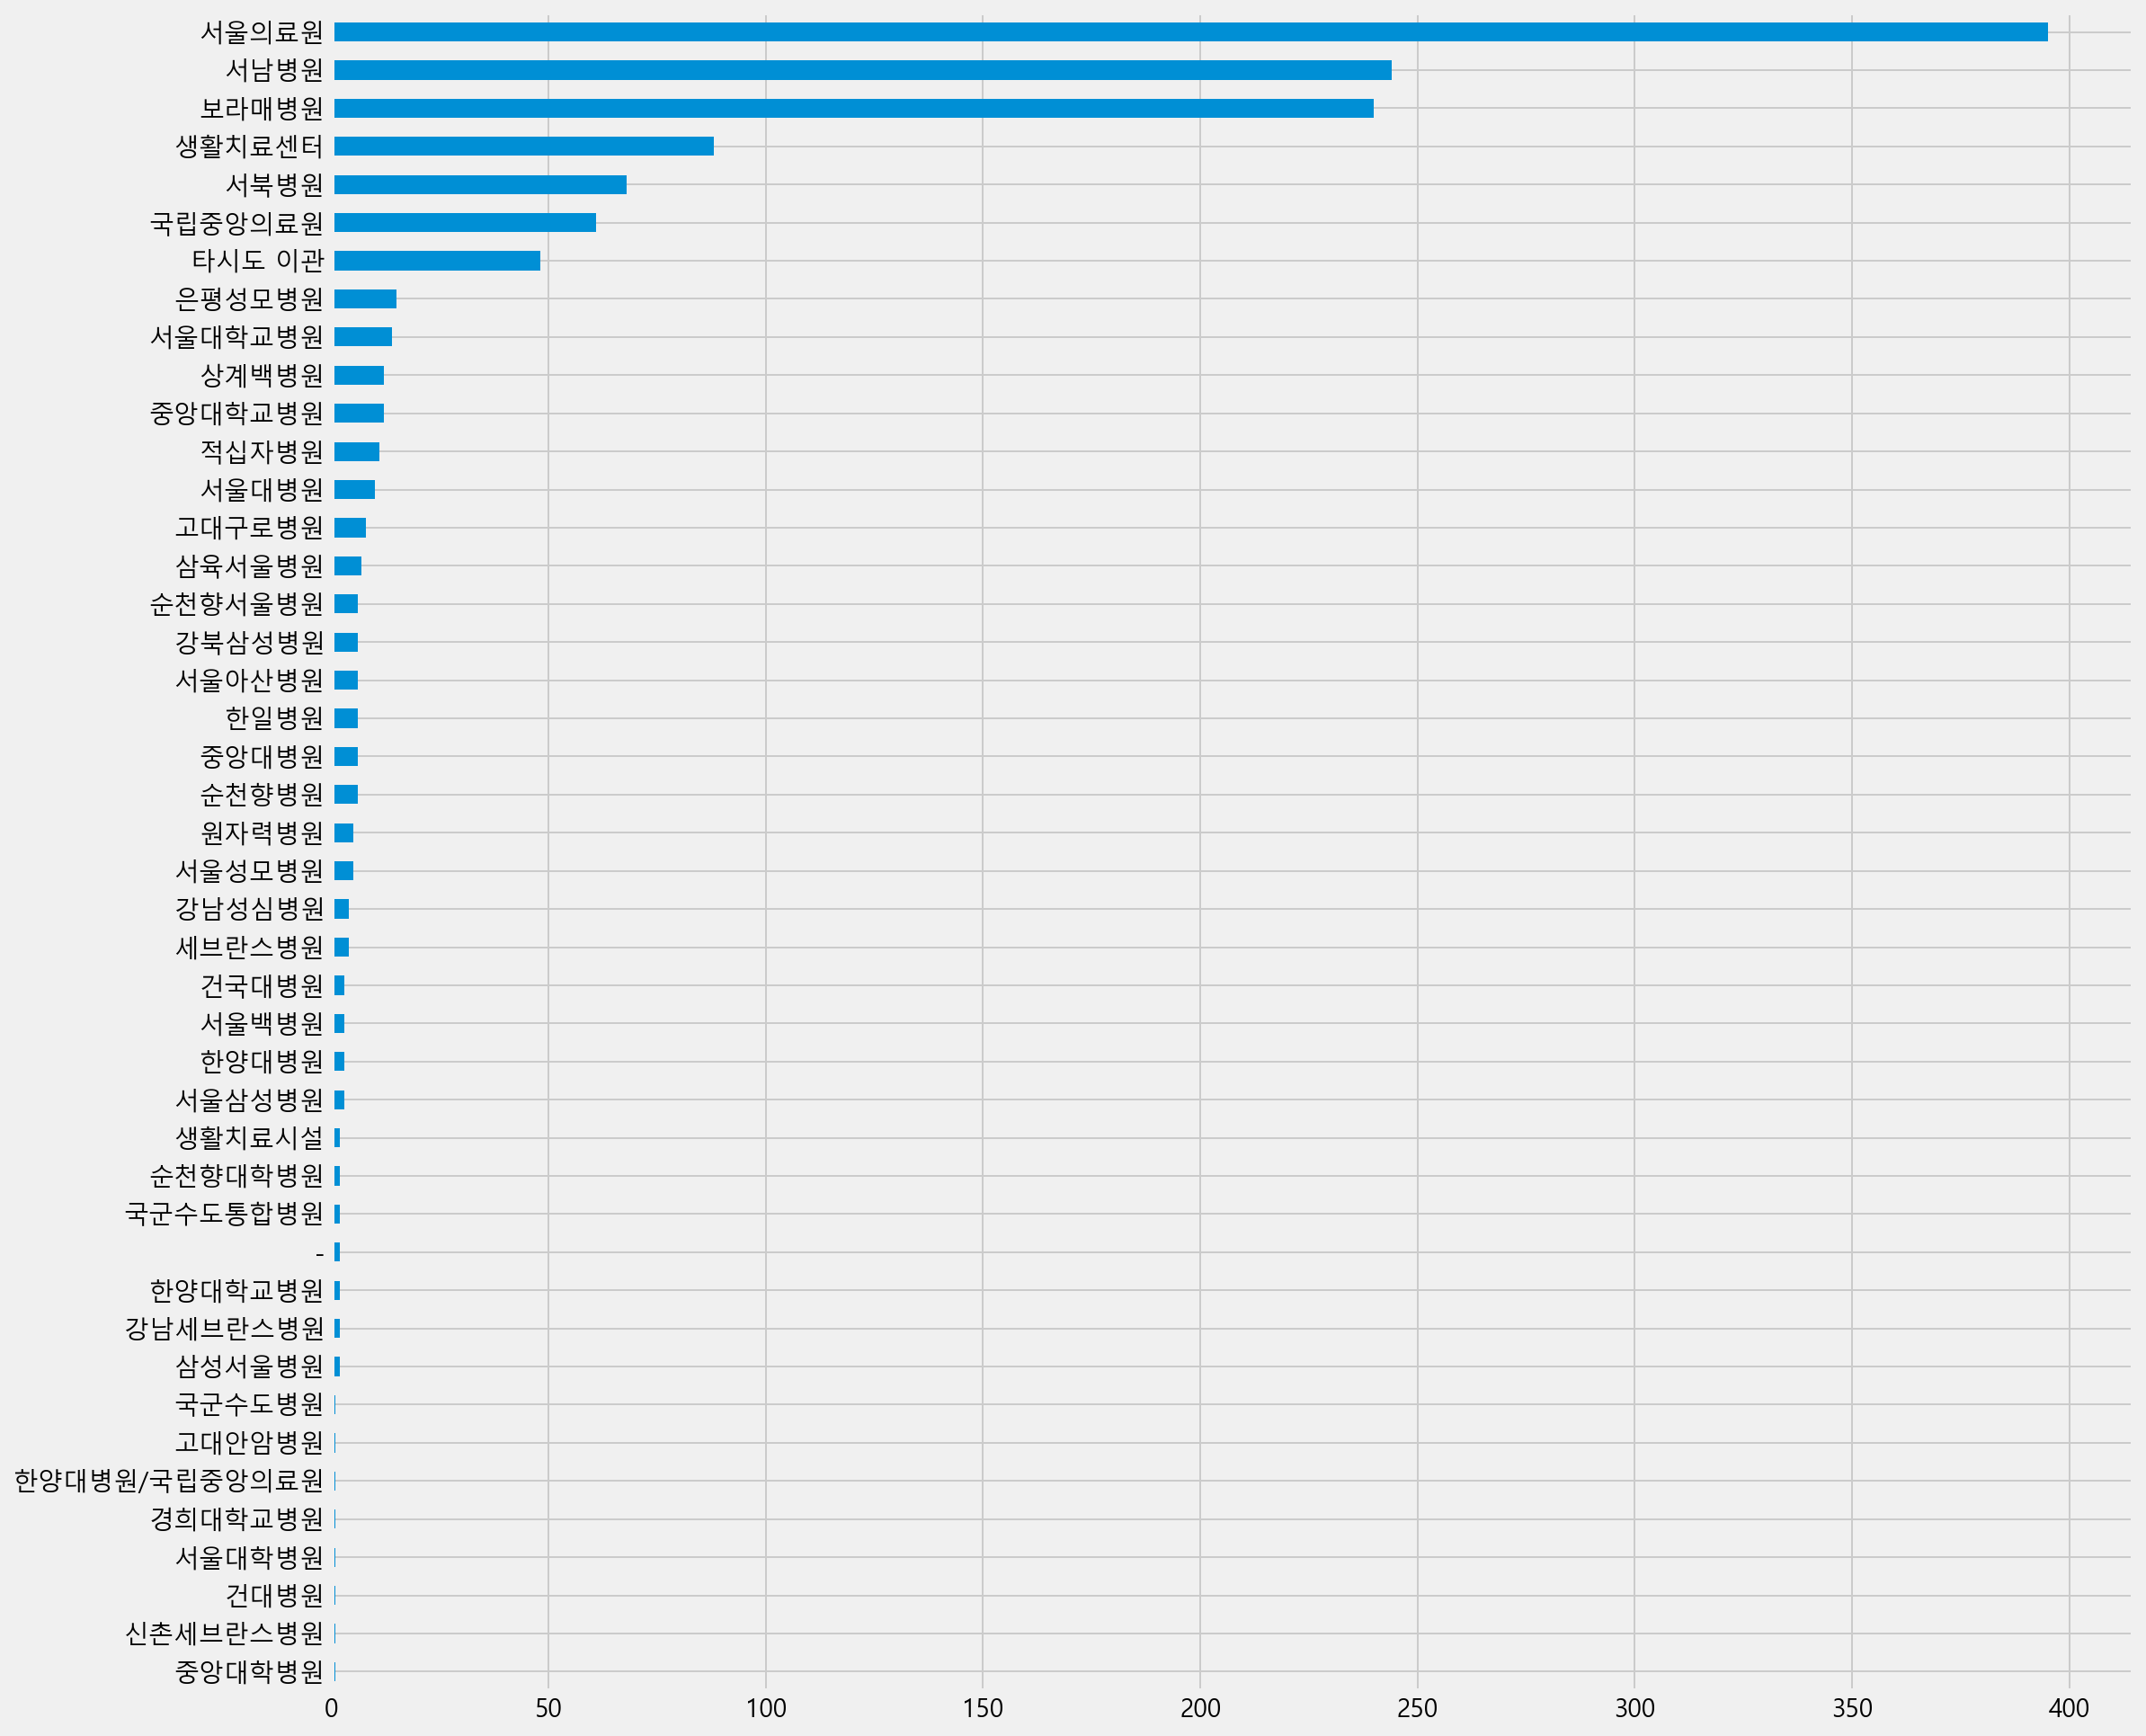

In [49]:
hospital_count.sort_values().plot.barh(figsize = (16,16))

In [53]:
# 입원환자가 많은 병원(상위 10개)

top_hospital_count = hospital_count.head(10)
top_hospital_count = top_hospital_count.index
top_hospital_count

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '중앙대학교병원'],
      dtype='object')

In [58]:
hospital_gu = df.groupby(['거주지', '병원'])['연번'].count().unstack()
hospital_gu

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,...,은평성모병원,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
거주지,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
경북,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
광명시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
광진구,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
hospital_gu.fillna(0).iloc[:8, :8].astype(int)

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원
거주지,,,,,,,,
강남구,0,0,1,0,0,0,0,1
강동구,0,0,0,0,1,0,0,0
강북구,0,0,0,0,0,0,0,0
강서구,0,1,0,2,1,0,0,0
경북,0,0,0,0,0,0,0,0
고양시,0,0,0,0,0,0,0,0
관악구,0,2,0,2,0,0,0,2
광명시,0,0,0,0,0,0,0,0


In [67]:
hospital_gu.loc[['강남구', '강서구'], ["강남성심병원", "서울의료원"]]

병원,강남성심병원,서울의료원
거주지,,
강남구,NaN,26.0
강서구,1.0,9.0


In [68]:
hospital_gu.loc[['강남구', '강서구'], top_hospital_count]

,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,중앙대학교병원
거주지,,,,,,,,,,
강남구,26.0,7.0,21.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN
강서구,9.0,26.0,14.0,4.0,7.0,2.0,NaN,4.0,1.0,1.0


In [71]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap[top_hospital_count].T.style.background_gradient()

거주지,강남구,강동구,강북구,강서구,경북,고양시,관악구,광명시,광진구,구로구,구리시,국외거주,군포시,금천구,기타,김포시,남양주,노원구,대구시,대전시,도봉구,동대문구,동작구,마포구,미국,부천시,부평,서대문구,서초구,성남시,성동구,성북구,송파구,수원시,스페인,시흥시,아산시,안산시,안양,안양시,양산시,양주시,양천구,양평,영등포구,용산구,용인시,은평구,의왕시,의정부,인천시,재외국민,종로구,주소불명,중구,중랑구,천안시,파주시,평택시,화성시
병원,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,0,1,21,0,9,16,0,0,0,1,0,0,2,29,1,0,35,11,8,13,1,0,0,10,17,0,25,18,28,0,0,0,0,0,0,0,1,0,12,0,16,15,0,9,0,0,2,0,3,1,2,19,0,0,0,0
서남병원,7,2,5,26,0,0,24,1,1,23,0,0,0,15,0,0,0,1,0,1,8,5,12,13,0,0,0,6,7,0,4,2,6,0,0,0,0,0,0,0,0,0,33,0,25,2,0,10,0,0,0,0,3,0,1,1,0,0,0,0
보라매병원,21,0,2,14,0,1,41,0,2,25,0,0,0,13,0,0,0,3,0,0,3,8,24,3,0,0,0,3,13,0,6,2,2,0,4,0,0,1,0,0,0,0,14,1,8,6,0,10,0,0,0,0,4,0,3,3,0,0,0,0
생활치료센터,6,0,1,4,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,1,2,3,4,2,0,0,0,2,10,0,1,5,9,0,0,0,0,0,0,0,0,0,6,0,4,5,0,5,0,0,0,0,0,0,1,6,0,0,0,0
서북병원,2,1,0,7,0,0,4,0,1,3,0,0,0,0,0,0,0,4,0,0,2,4,2,1,0,0,0,6,4,1,3,0,2,0,0,0,0,0,0,0,0,0,2,0,2,2,0,10,0,0,0,1,0,0,1,3,0,0,0,0
국립중앙의료원,4,4,1,2,0,0,3,0,1,12,0,0,0,1,0,0,0,1,1,0,3,3,1,1,0,0,0,4,2,0,3,1,1,0,0,0,1,0,0,0,0,0,1,0,3,2,0,2,0,0,1,0,1,0,0,1,0,0,0,0
타시도 이관,0,0,0,0,0,5,0,7,0,0,1,0,1,0,0,5,3,0,0,0,0,0,0,0,0,2,1,0,0,4,0,0,0,3,0,0,0,0,1,1,0,2,0,2,0,0,2,0,1,2,1,0,0,0,0,0,2,0,1,1
은평성모병원,0,0,0,4,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0
서울대학교병원,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,0


In [72]:
hospital_gu_heatmap[top_hospital_count].style.background_gradient()

병원,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,중앙대학교병원
거주지,,,,,,,,,,
강남구,26,7,21,6,2,4,0,0,0,0
강동구,23,2,0,0,1,4,0,0,0,1
강북구,11,5,2,1,0,1,0,0,0,0
강서구,9,26,14,4,7,2,0,4,1,1
경북,0,0,0,0,0,0,0,0,0,1
고양시,1,0,1,0,0,0,5,0,0,0
관악구,21,24,41,9,4,3,0,1,0,1
광명시,0,1,0,0,0,0,7,0,0,0
광진구,9,1,2,0,1,1,0,0,1,0


## 해외 여행력

In [86]:
df['해외'] = df['여행력']
df['해외'] = df['해외'].str.strip()
df['해외'] = df['해외'].replace('-', np.nan)
df['해외'].unique()

array([nan, '독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄',
       'UAE', '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드',
       '스페인', '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아',
       '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [87]:
df['해외'].describe()

count     306
unique     58
top        미국
freq      124
Name: 해외, dtype: object

In [88]:
df['해외'].value_counts()

미국                           124
영국                            45
필리핀                           18
스페인                           11
프랑스                           10
태국                             6
캐나다                            5
멕시코                            5
일본                             4
브라질                            4
파키스탄                           4
중국 우한시                         4
독일                             3
인도                             3
이탈리아                           3
UAE                            3
필리핀, 마닐라                       2
키르기스스탄                         2
팔라우                            2
이라크                            2
인도네시아                          2
아랍에미리트                         2
터키                             2
이탈리아, 프랑스                      2
프랑스, 독일                        2
카자흐스탄                          2
폴란드                            2
아일랜드                           2
말레이시아                          1
미국 뉴욕                          1
미국, 캐나다, 멕

In [92]:
# 해외 유입 감염

df_oversea = df[df['해외'].notnull()].copy()
df_oversea.shape

(306, 16)

In [94]:
df_oversea['해외'].unique()

array(['독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

In [99]:
# 유럽 유입 str.contains로 검색할 수 있도록 전처리

europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea['해외'].str.contains(europe)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,06-29,,False,False,서북병원,독일
428,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,06-02,,True,False,서울의료원,영국
658,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,05-09,,True,False,서울의료원,영국
684,637,10789,5.02.,강동구,터키,해외 접촉 추정,적십자병원(퇴원),2020-05-02,5,18,05-02,,True,False,적십자병원,터키
688,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,04-27,,True,False,적십자병원,영국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,191,7647,3.10.,은평구,"프랑스, 스페인",#6959 접촉(추정),서북병원(퇴원),2020-03-10,3,11,03-10,6959,True,False,서북병원,"프랑스, 스페인"
1205,116,6959,3.7.,은평구,"스페인, 프랑스",해외 접촉,서북병원(퇴원),2020-03-07,3,10,03-07,,True,False,서북병원,"스페인, 프랑스"
1218,103,5695,3.4.,동대문구,"이탈리아, 독일, 홍콩",해외 접촉,서북병원(퇴원),2020-03-04,3,10,03-04,,True,False,서북병원,"이탈리아, 독일, 홍콩"
1236,85,3681,2.29.,강남구,이탈리아,해외 접촉,국립중앙의료원(퇴원),2020-02-29,2,9,02-29,,True,False,국립중앙의료원,이탈리아


In [108]:
# 남미 유입

south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [121]:
df_oversea.loc[df_oversea['해외'].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea['해외'].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea['해외'].str.contains("우한"), "해외"] = '중국'
df_oversea.loc[df_oversea['해외'].str.contains("중국"), "해외"] = '중국'
df_oversea.loc[df_oversea['해외'].str.contains("아랍에미리트"), "해외"] = 'UAE'
df_oversea.loc[df_oversea['해외'].str.contains("필리핀"), "해외"] = '필리핀'
df_oversea.loc[df_oversea['해외'].str.contains("미국"), "해외"] = '미국'
df_oversea['해외'].value_counts()

미국           126
유럽            94
필리핀           20
남미            15
중국             7
태국             6
캐나다            5
UAE            5
파키스탄           4
일본             4
인도             3
팔라우            2
인도네시아          2
카자흐스탄          2
키르기스스탄         2
이라크            2
베트남            1
싱가포르           1
러시아            1
방글라데시          1
말레이시아          1
호주, 인도네시아      1
포르투칼           1
Name: 해외, dtype: int64

In [122]:
df_oversea['해외'].describe()

count     306
unique     23
top        미국
freq      126
Name: 해외, dtype: object

In [124]:
day_oversea = df_oversea.groupby(['확진일자','해외'])['연번'].count()
day_oversea

확진일자        해외    
2020-01-24  중국        1
2020-01-30  중국        2
2020-02-02  중국        1
2020-02-05  싱가포르      1
2020-02-06  중국        1
                     ..
2020-06-26  이라크       1
            키르기스스탄    1
2020-06-27  키르기스스탄    1
2020-06-28  미국        1
2020-06-29  유럽        1
Name: 연번, Length: 163, dtype: int64

In [127]:
# 지역별 누적 확진수

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-06-26  이라크         2
            키르기스스탄      1
2020-06-27  키르기스스탄      2
2020-06-28  미국        126
2020-06-29  유럽         94
Name: 연번, Length: 163, dtype: int64

In [130]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns = {'연번' : '누적확진수'})
df_day_oversea

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5
...,...,...,...
158,2020-06-26,이라크,2
159,2020-06-26,키르기스스탄,1
160,2020-06-27,키르기스스탄,2
161,2020-06-28,미국,126


<AxesSubplot:>

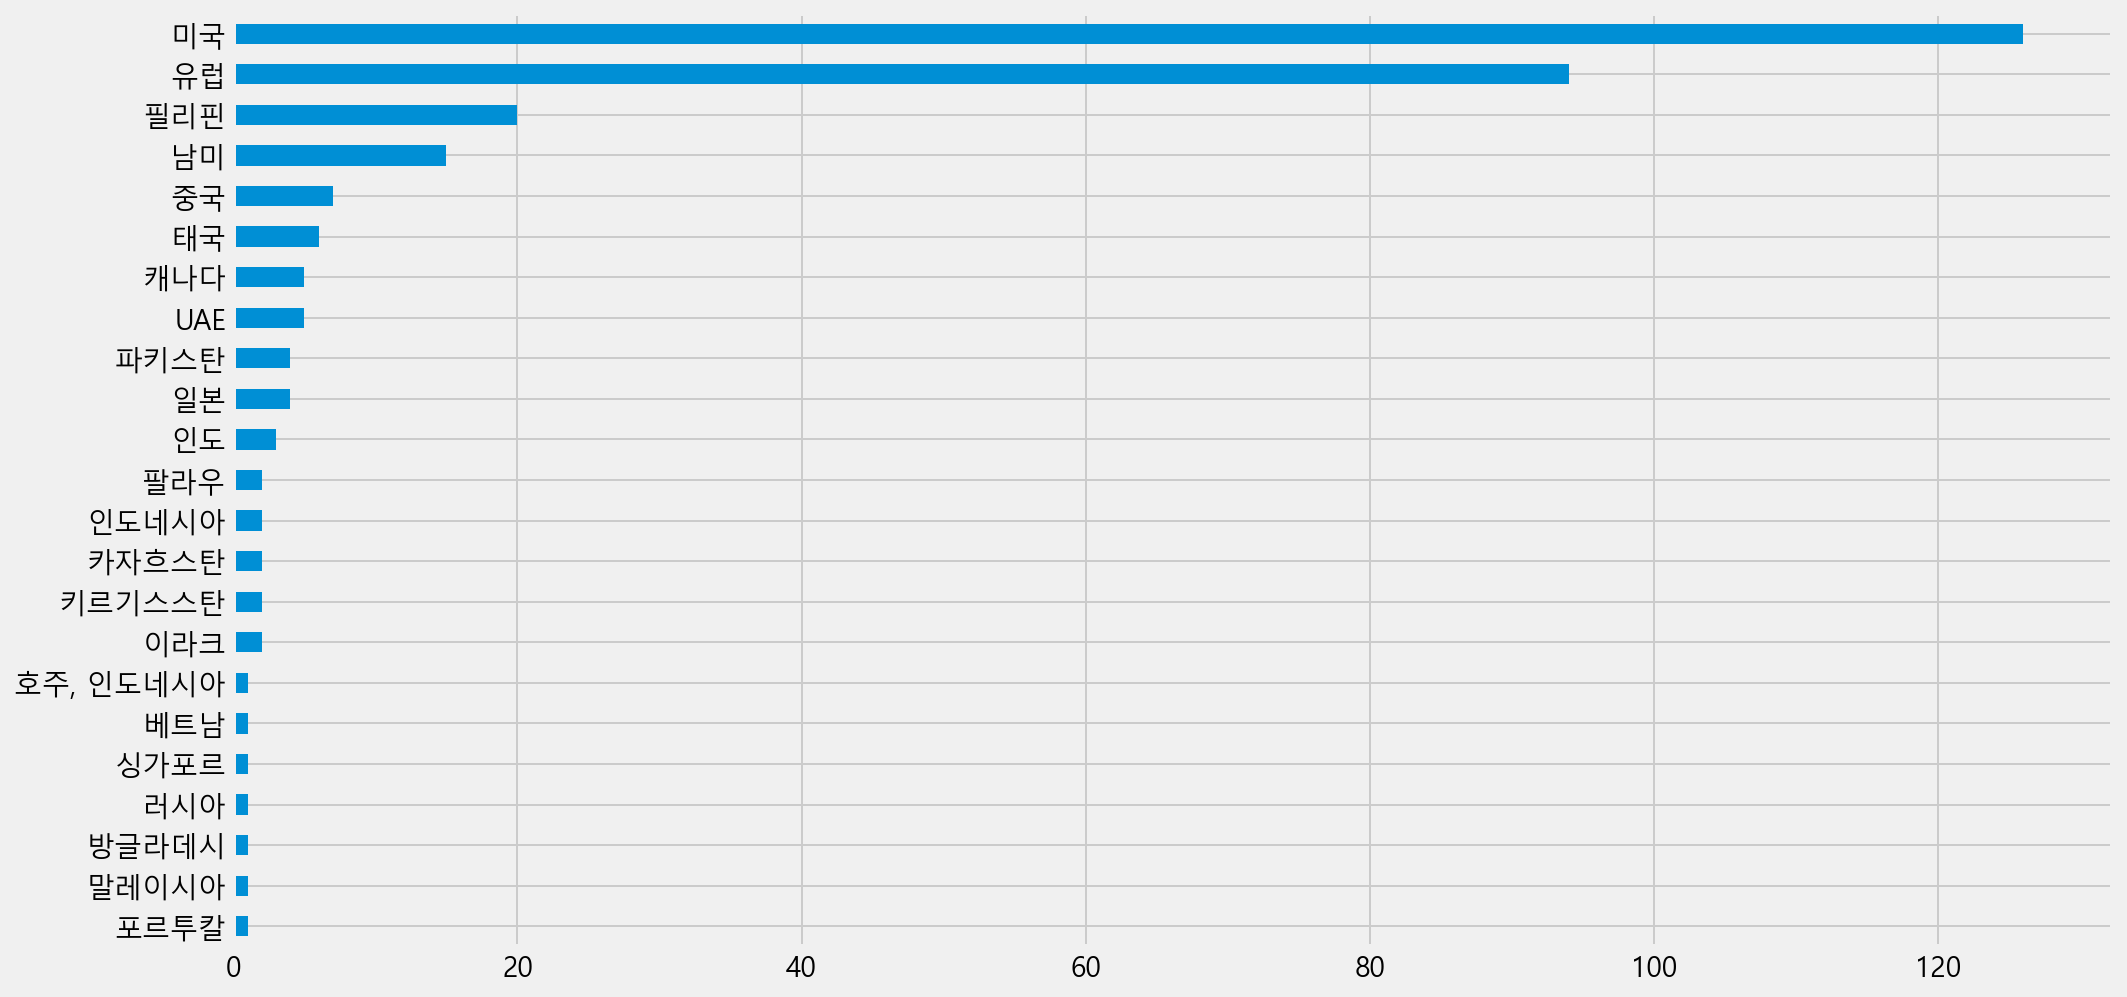

In [133]:
oversea_count = df_oversea['해외'].value_counts()
oversea_count.sort_values().plot.barh(figsize = (15,8))

In [138]:
df_day_oversea = df_day_oversea.set_index('확진일자')

KeyError: "None of ['확진일자'] are in the columns"

<AxesSubplot:xlabel='확진일자'>

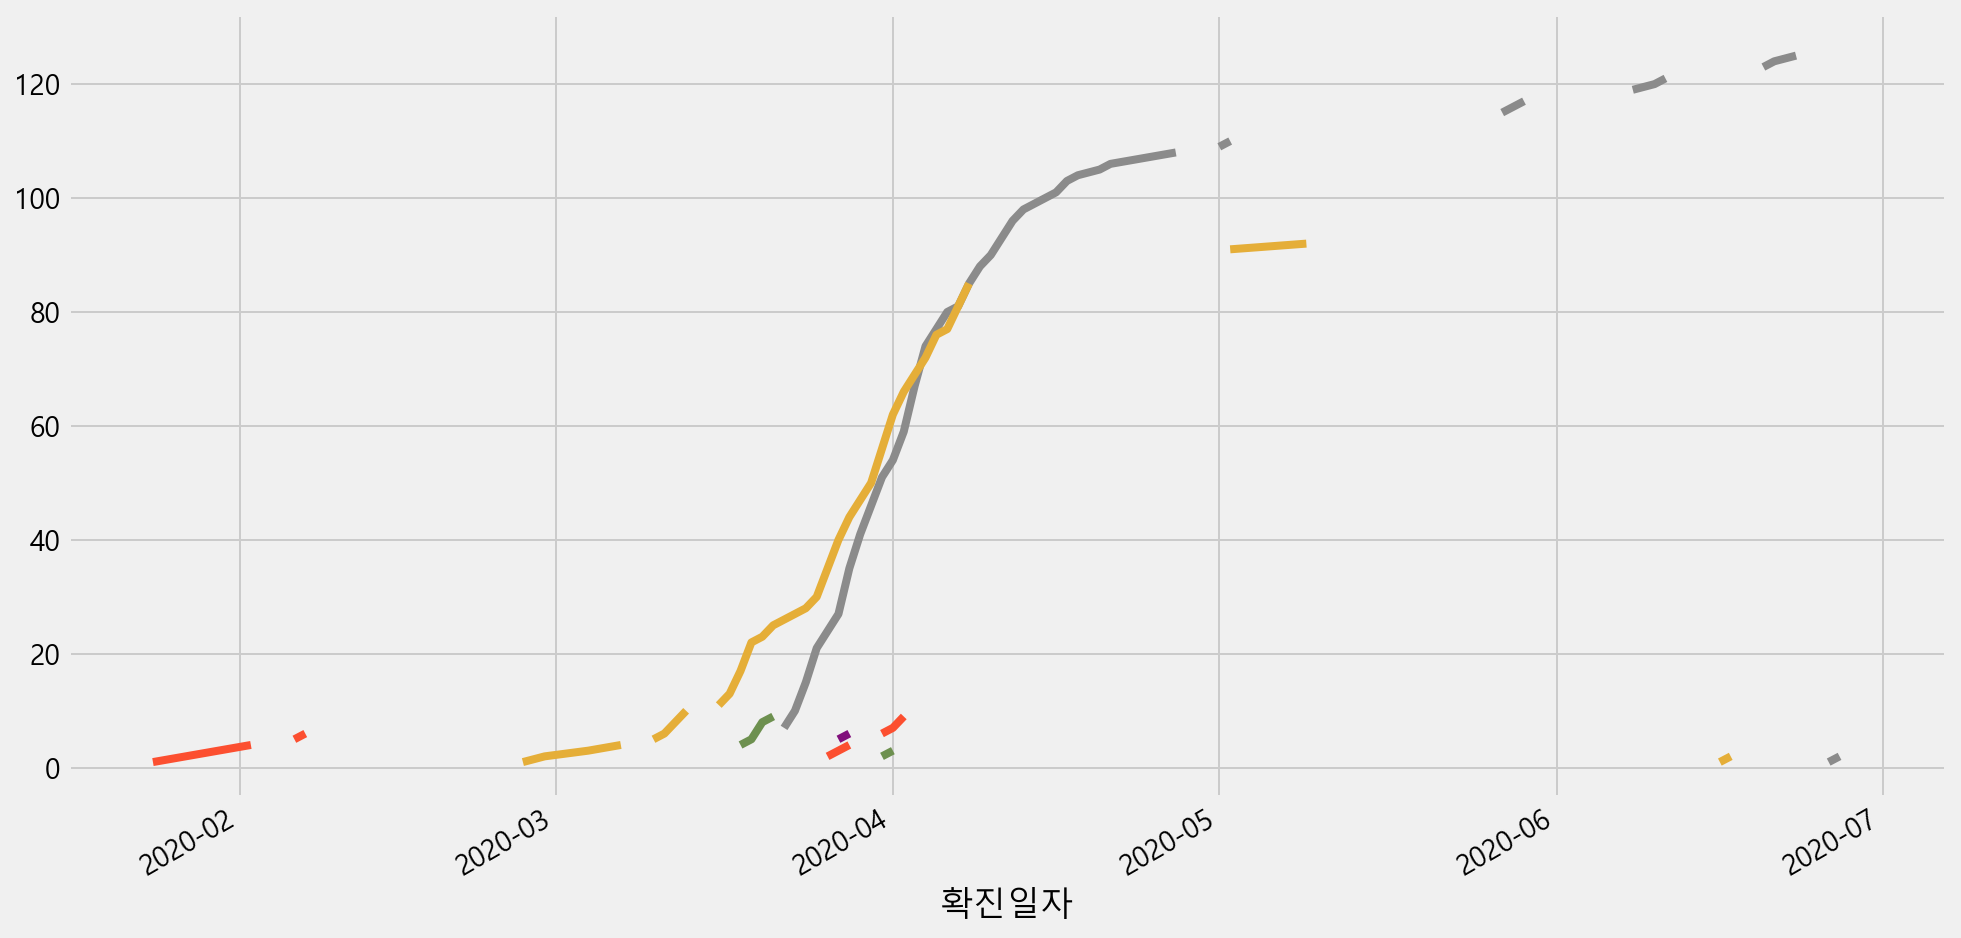

In [140]:
df_day_oversea.pivot(columns='해외').plot(figsize = (15,8), legend=False)

<AxesSubplot:xlabel='확진일자'>

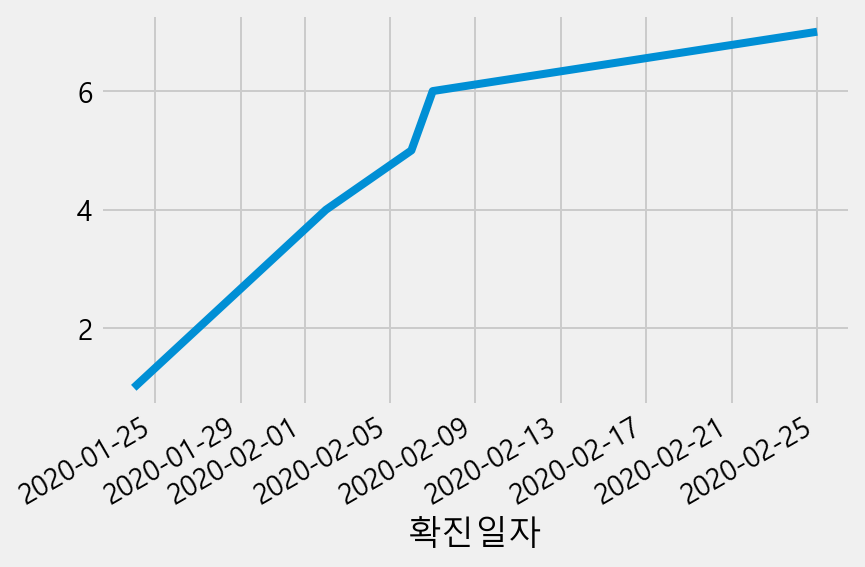

In [144]:
df_day_oversea.loc[df_day_oversea['해외'] == '중국', "누적확진수"].plot()

<AxesSubplot:xlabel='확진일자'>

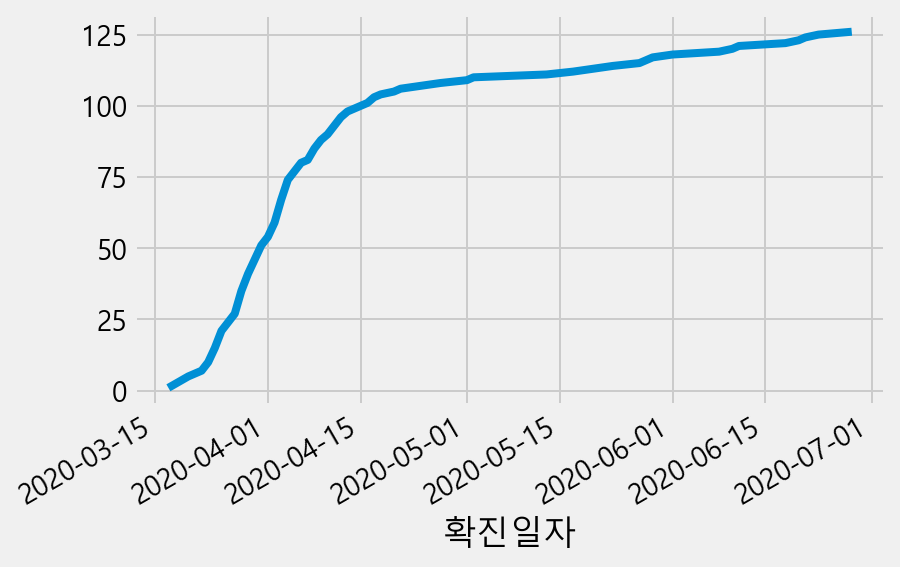

In [145]:
df_day_oversea.loc[df_day_oversea['해외'] == '미국', "누적확진수"].plot()

In [148]:
oversea_count_gu = df_oversea['거주지'].value_counts()
oversea_count_gu.head()

강남구    41
서초구    28
송파구    24
용산구    17
마포구    15
Name: 거주지, dtype: int64

<AxesSubplot:>

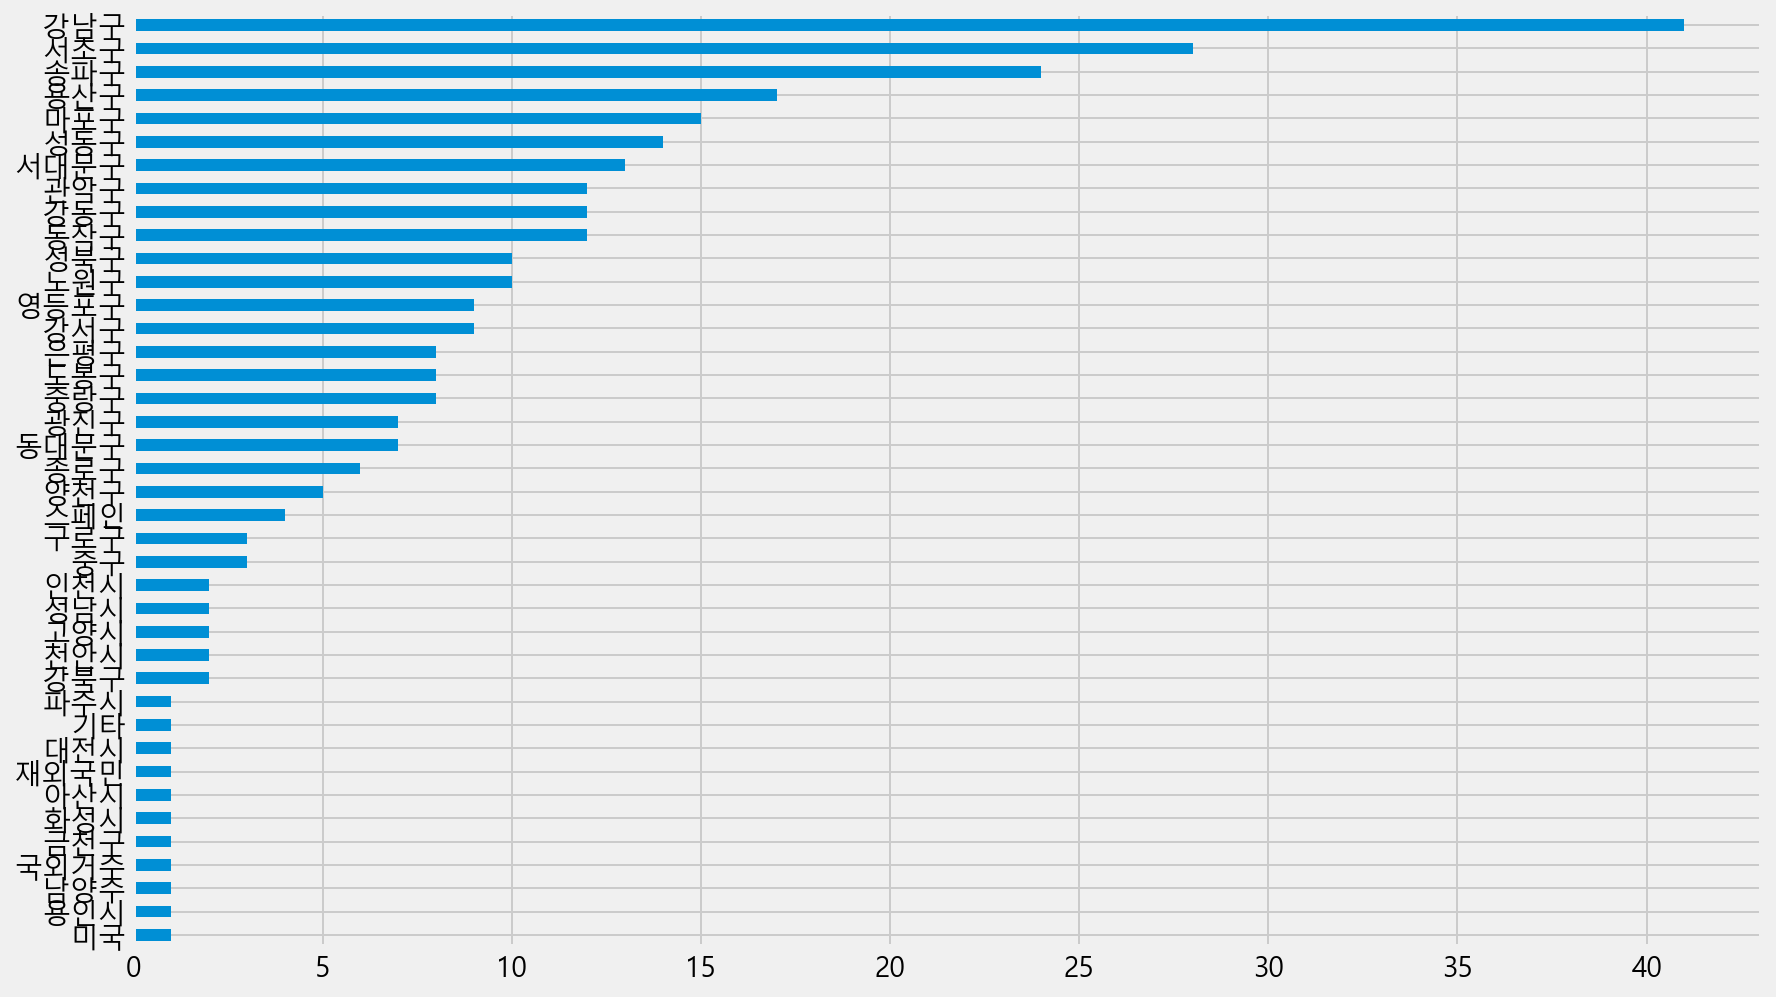

In [153]:
oversea_count_gu.sort_values().plot.barh(figsize = (13,8))

## 전체확진수와 해외유입 확진수 비교

In [156]:
all_count_gu = df['거주지'].value_counts()
all_count_gu.head()

관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

In [161]:
# pd.DataFrame({'해외확진수' : oversea_count_gu, '전체확진수' : all_count_gu})

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ['전체확진수']
df_all_gu.head()

,전체확진수
관악구,117
구로구,86
강남구,83
강서구,78
양천구,70


In [162]:
df_oversea_gu = pd.DataFrame({'해외유입확진수' : oversea_count_gu})
df_oversea_gu.head()

,해외유입확진수
강남구,41
서초구,28
송파구,24
용산구,17
마포구,15


In [166]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,117,12
구로구,86,3
강남구,83,41
강서구,78,9
양천구,70,5


<AxesSubplot:>

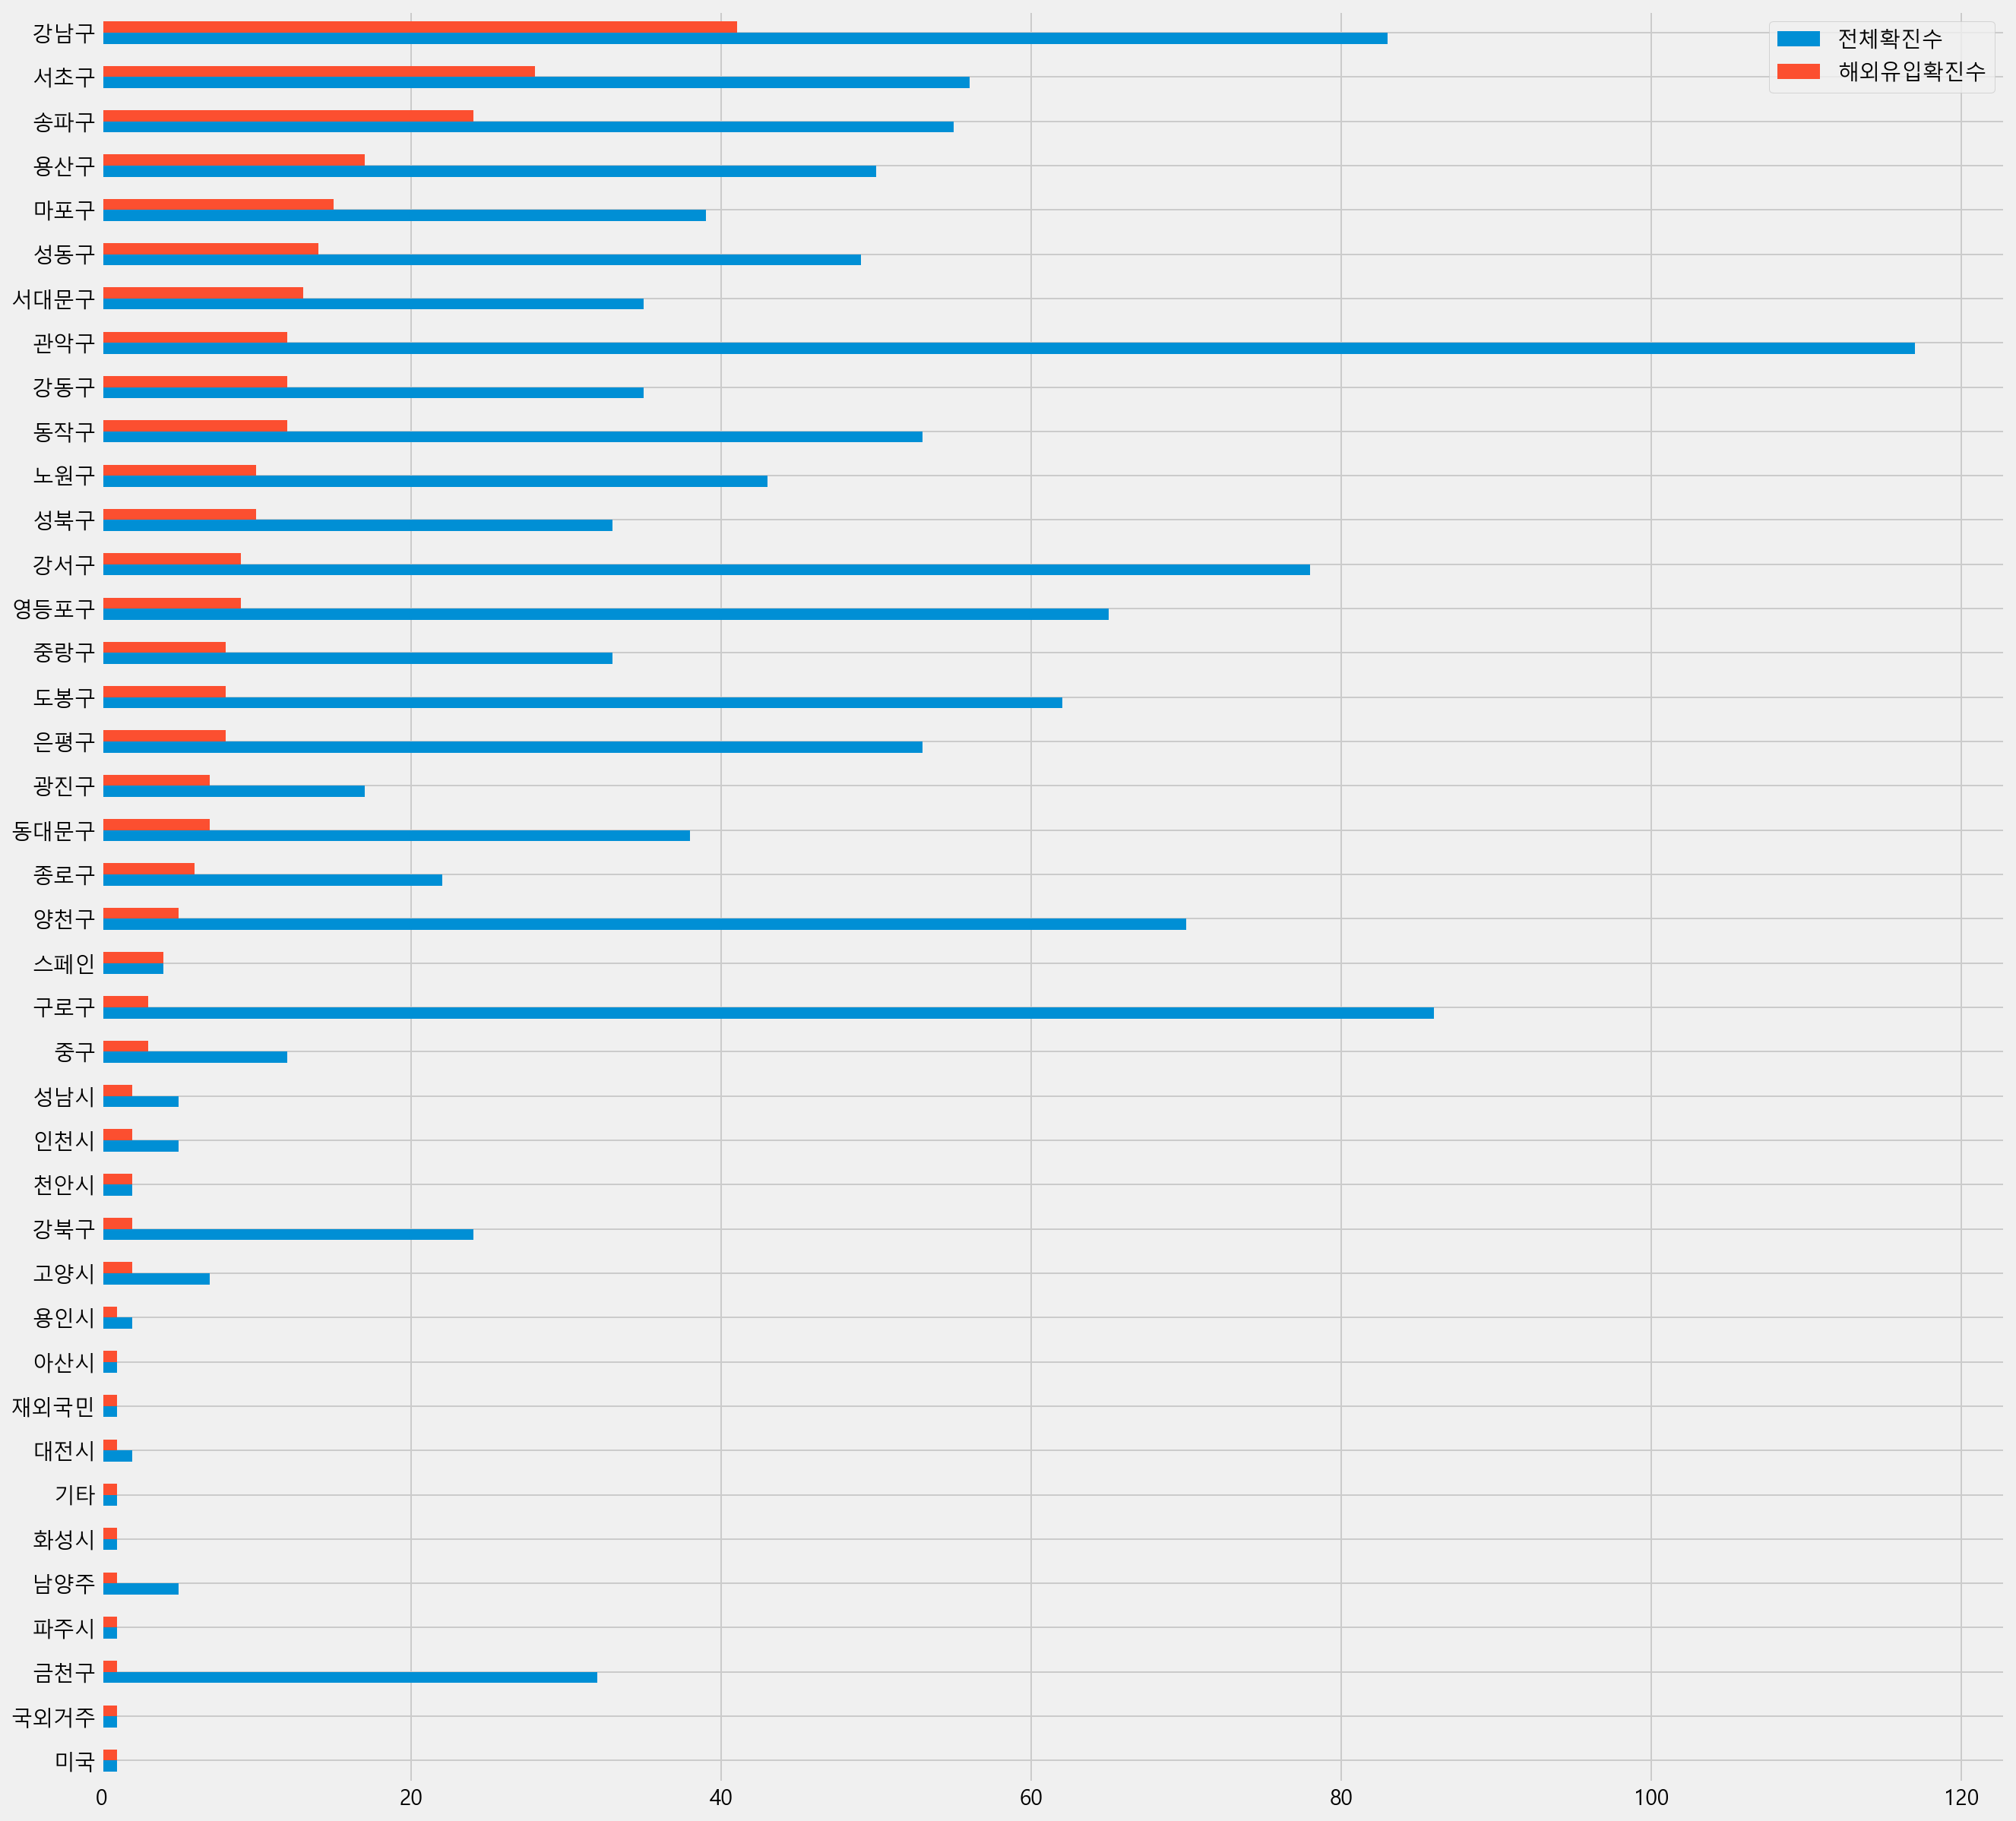

In [173]:
df_all_oversea_case.sort_values(by='해외유입확진수').plot.barh(figsize = (20,20))

In [178]:
df_all_oversea_case['해외유입비율'] = df_all_oversea_case['해외유입확진수'] / df_all_oversea_case['전체확진수'] * 100
df_all_oversea_case.head(25).sort_values(by='해외유입비율', ascending=False)

,전체확진수,해외유입확진수,해외유입비율
서초구,56,28,50.000000
강남구,83,41,49.397590
송파구,55,24,43.636364
광진구,17,7,41.176471
마포구,39,15,38.461538
서대문구,35,13,37.142857
강동구,35,12,34.285714
용산구,50,17,34.000000
성북구,33,10,30.303030
성동구,49,14,28.571429


## 해외유입 확진자 중 퇴원 여부

<AxesSubplot:xlabel='거주지'>

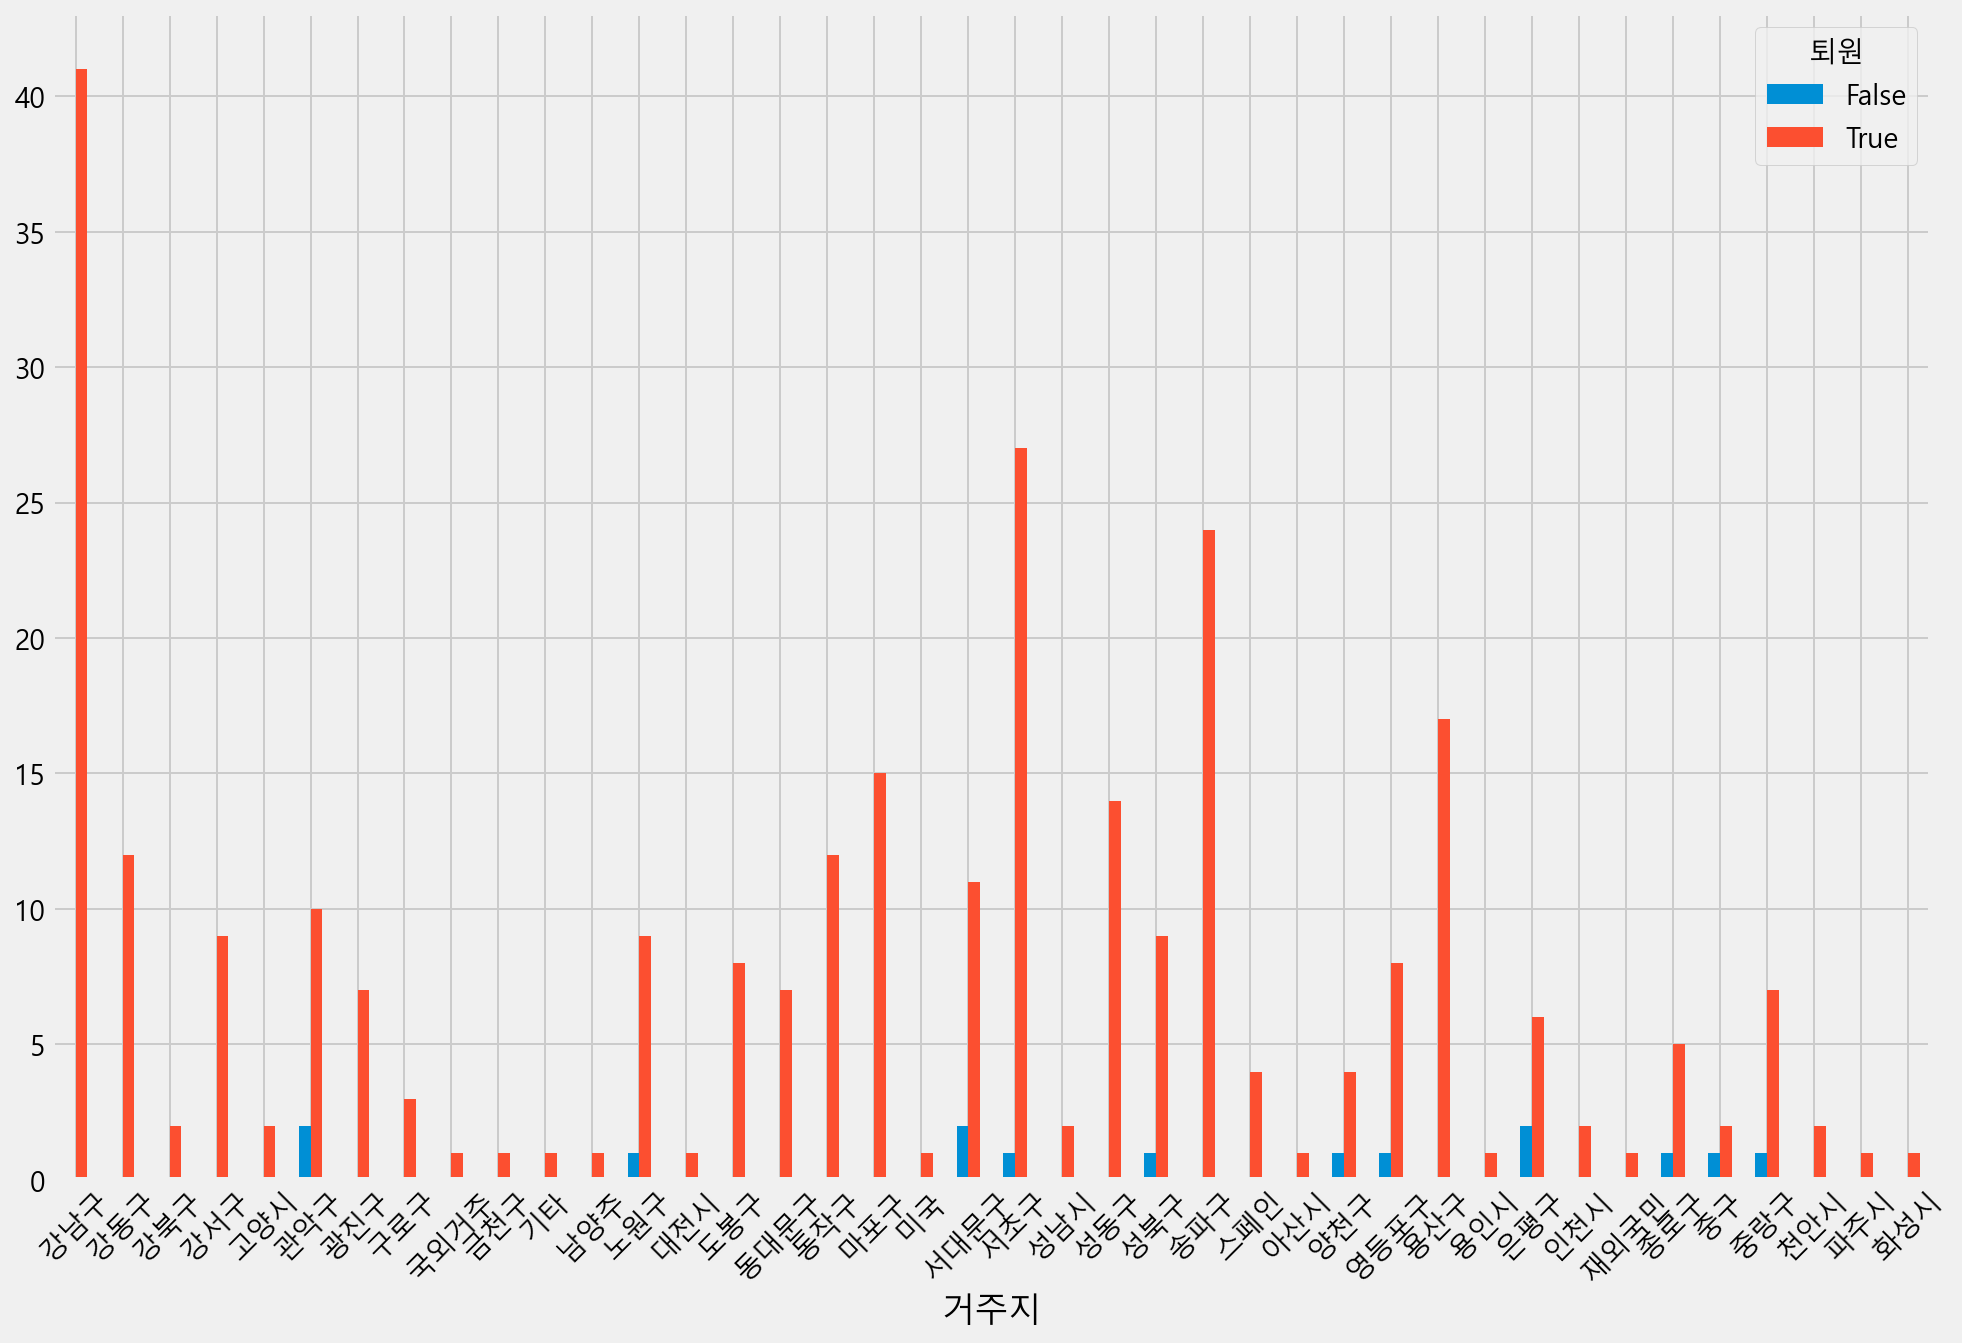

In [192]:
oversea_finish_count = df_oversea.groupby(['거주지', '퇴원'])['연번'].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize = (15,10), rot=45)

<AxesSubplot:>

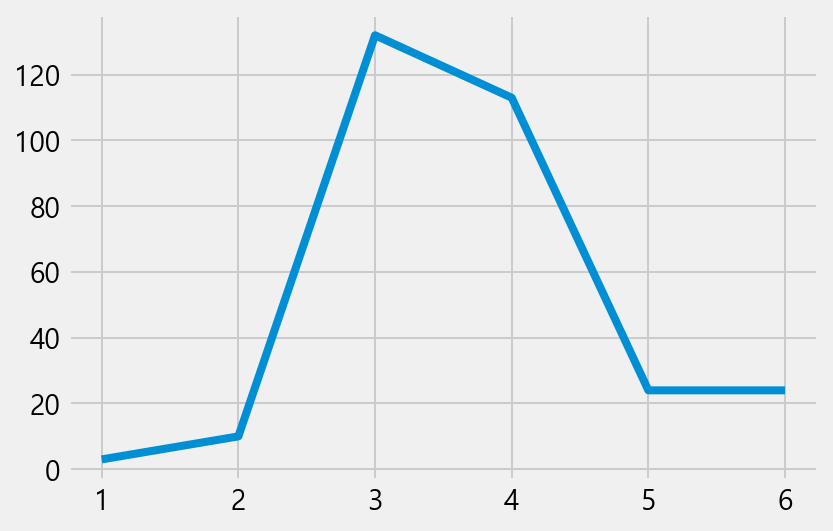

In [197]:
# 해외 유입이 가장 많았던 달

oversea_monthly_case = df_oversea['월'].value_counts()
oversea_monthly_case.sort_index().plot()

<AxesSubplot:>

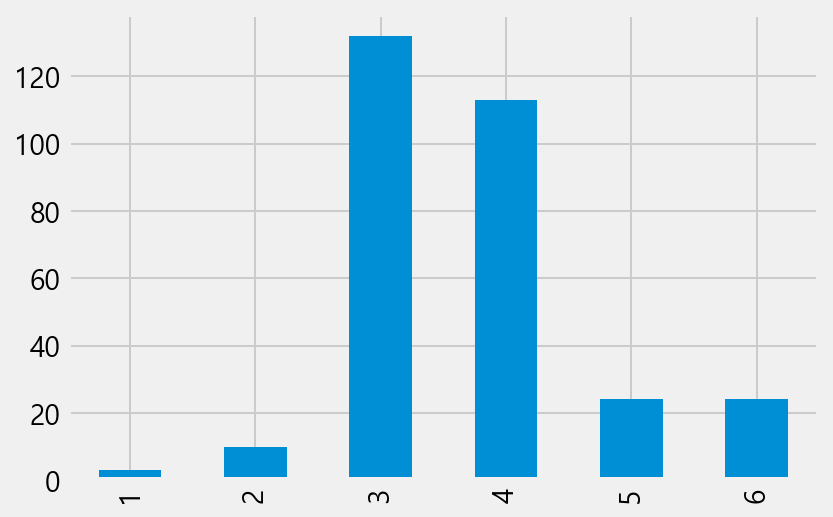

In [198]:
oversea_monthly_case.sort_index().plot.bar()

## 구와 월별 해외 확진자 수

In [205]:
month_gu = df_oversea.groupby(['월', '거주지'])['연번'].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient()

거주지,강남구,강동구,강북구,강서구,고양시,관악구,광진구,구로구,국외거주,금천구,기타,남양주,노원구,대전시,도봉구,동대문구,동작구,마포구,미국,서대문구,서초구,성남시,성동구,성북구,송파구,스페인,아산시,양천구,영등포구,용산구,용인시,은평구,인천시,재외국민,종로구,중구,중랑구,천안시,파주시,화성시
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,22,5,1,3,0,5,4,3,1,0,0,0,3,1,3,2,8,6,0,2,14,2,2,4,12,0,0,1,4,7,0,3,1,1,3,2,5,1,1,0
4,16,3,0,3,2,5,2,0,0,0,0,1,2,0,3,4,4,7,1,5,11,0,10,5,8,4,0,1,3,5,1,3,0,0,1,0,1,1,0,1
5,2,2,1,1,0,0,0,0,0,0,0,0,3,0,2,0,0,1,0,3,1,0,1,0,1,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0
6,0,2,0,0,0,2,0,0,0,0,1,0,2,0,0,1,0,0,0,2,2,0,1,1,1,0,0,3,1,0,0,2,0,0,1,1,1,0,0,0


In [208]:
month_gu = pd.crosstab(df_oversea['월'], df_oversea['거주지'])
month_gu = month_gu.style.bar()
month_gu

거주지,강남구,강동구,강북구,강서구,고양시,관악구,광진구,구로구,국외거주,금천구,기타,남양주,노원구,대전시,도봉구,동대문구,동작구,마포구,미국,서대문구,서초구,성남시,성동구,성북구,송파구,스페인,아산시,양천구,영등포구,용산구,용인시,은평구,인천시,재외국민,종로구,중구,중랑구,천안시,파주시,화성시
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,22,5,1,3,0,5,4,3,1,0,0,0,3,1,3,2,8,6,0,2,14,2,2,4,12,0,0,1,4,7,0,3,1,1,3,2,5,1,1,0
4,16,3,0,3,2,5,2,0,0,0,0,1,2,0,3,4,4,7,1,5,11,0,10,5,8,4,0,1,3,5,1,3,0,0,1,0,1,1,0,1
5,2,2,1,1,0,0,0,0,0,0,0,0,3,0,2,0,0,1,0,3,1,0,1,0,1,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0
6,0,2,0,0,0,2,0,0,0,0,1,0,2,0,0,1,0,0,0,2,2,0,1,1,1,0,0,3,1,0,0,2,0,0,1,1,1,0,0,0


In [219]:
month_gu = pd.pivot_table(df_oversea, index='월',values='연번', columns = '거주지', aggfunc='count', fill_value=0)
month_gu

거주지,강남구,강동구,강북구,강서구,고양시,관악구,광진구,구로구,국외거주,금천구,...,용인시,은평구,인천시,재외국민,종로구,중구,중랑구,천안시,파주시,화성시
월,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,22,5,1,3,0,5,4,3,1,0,...,0,3,1,1,3,2,5,1,1,0
4,16,3,0,3,2,5,2,0,0,0,...,1,3,0,0,1,0,1,1,0,1
5,2,2,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,2,0,0,0,2,0,0,0,0,...,0,2,0,0,1,1,1,0,0,0


In [228]:
# 상위 5개 지역

top_oversea_gu = df_oversea_gu.head().index

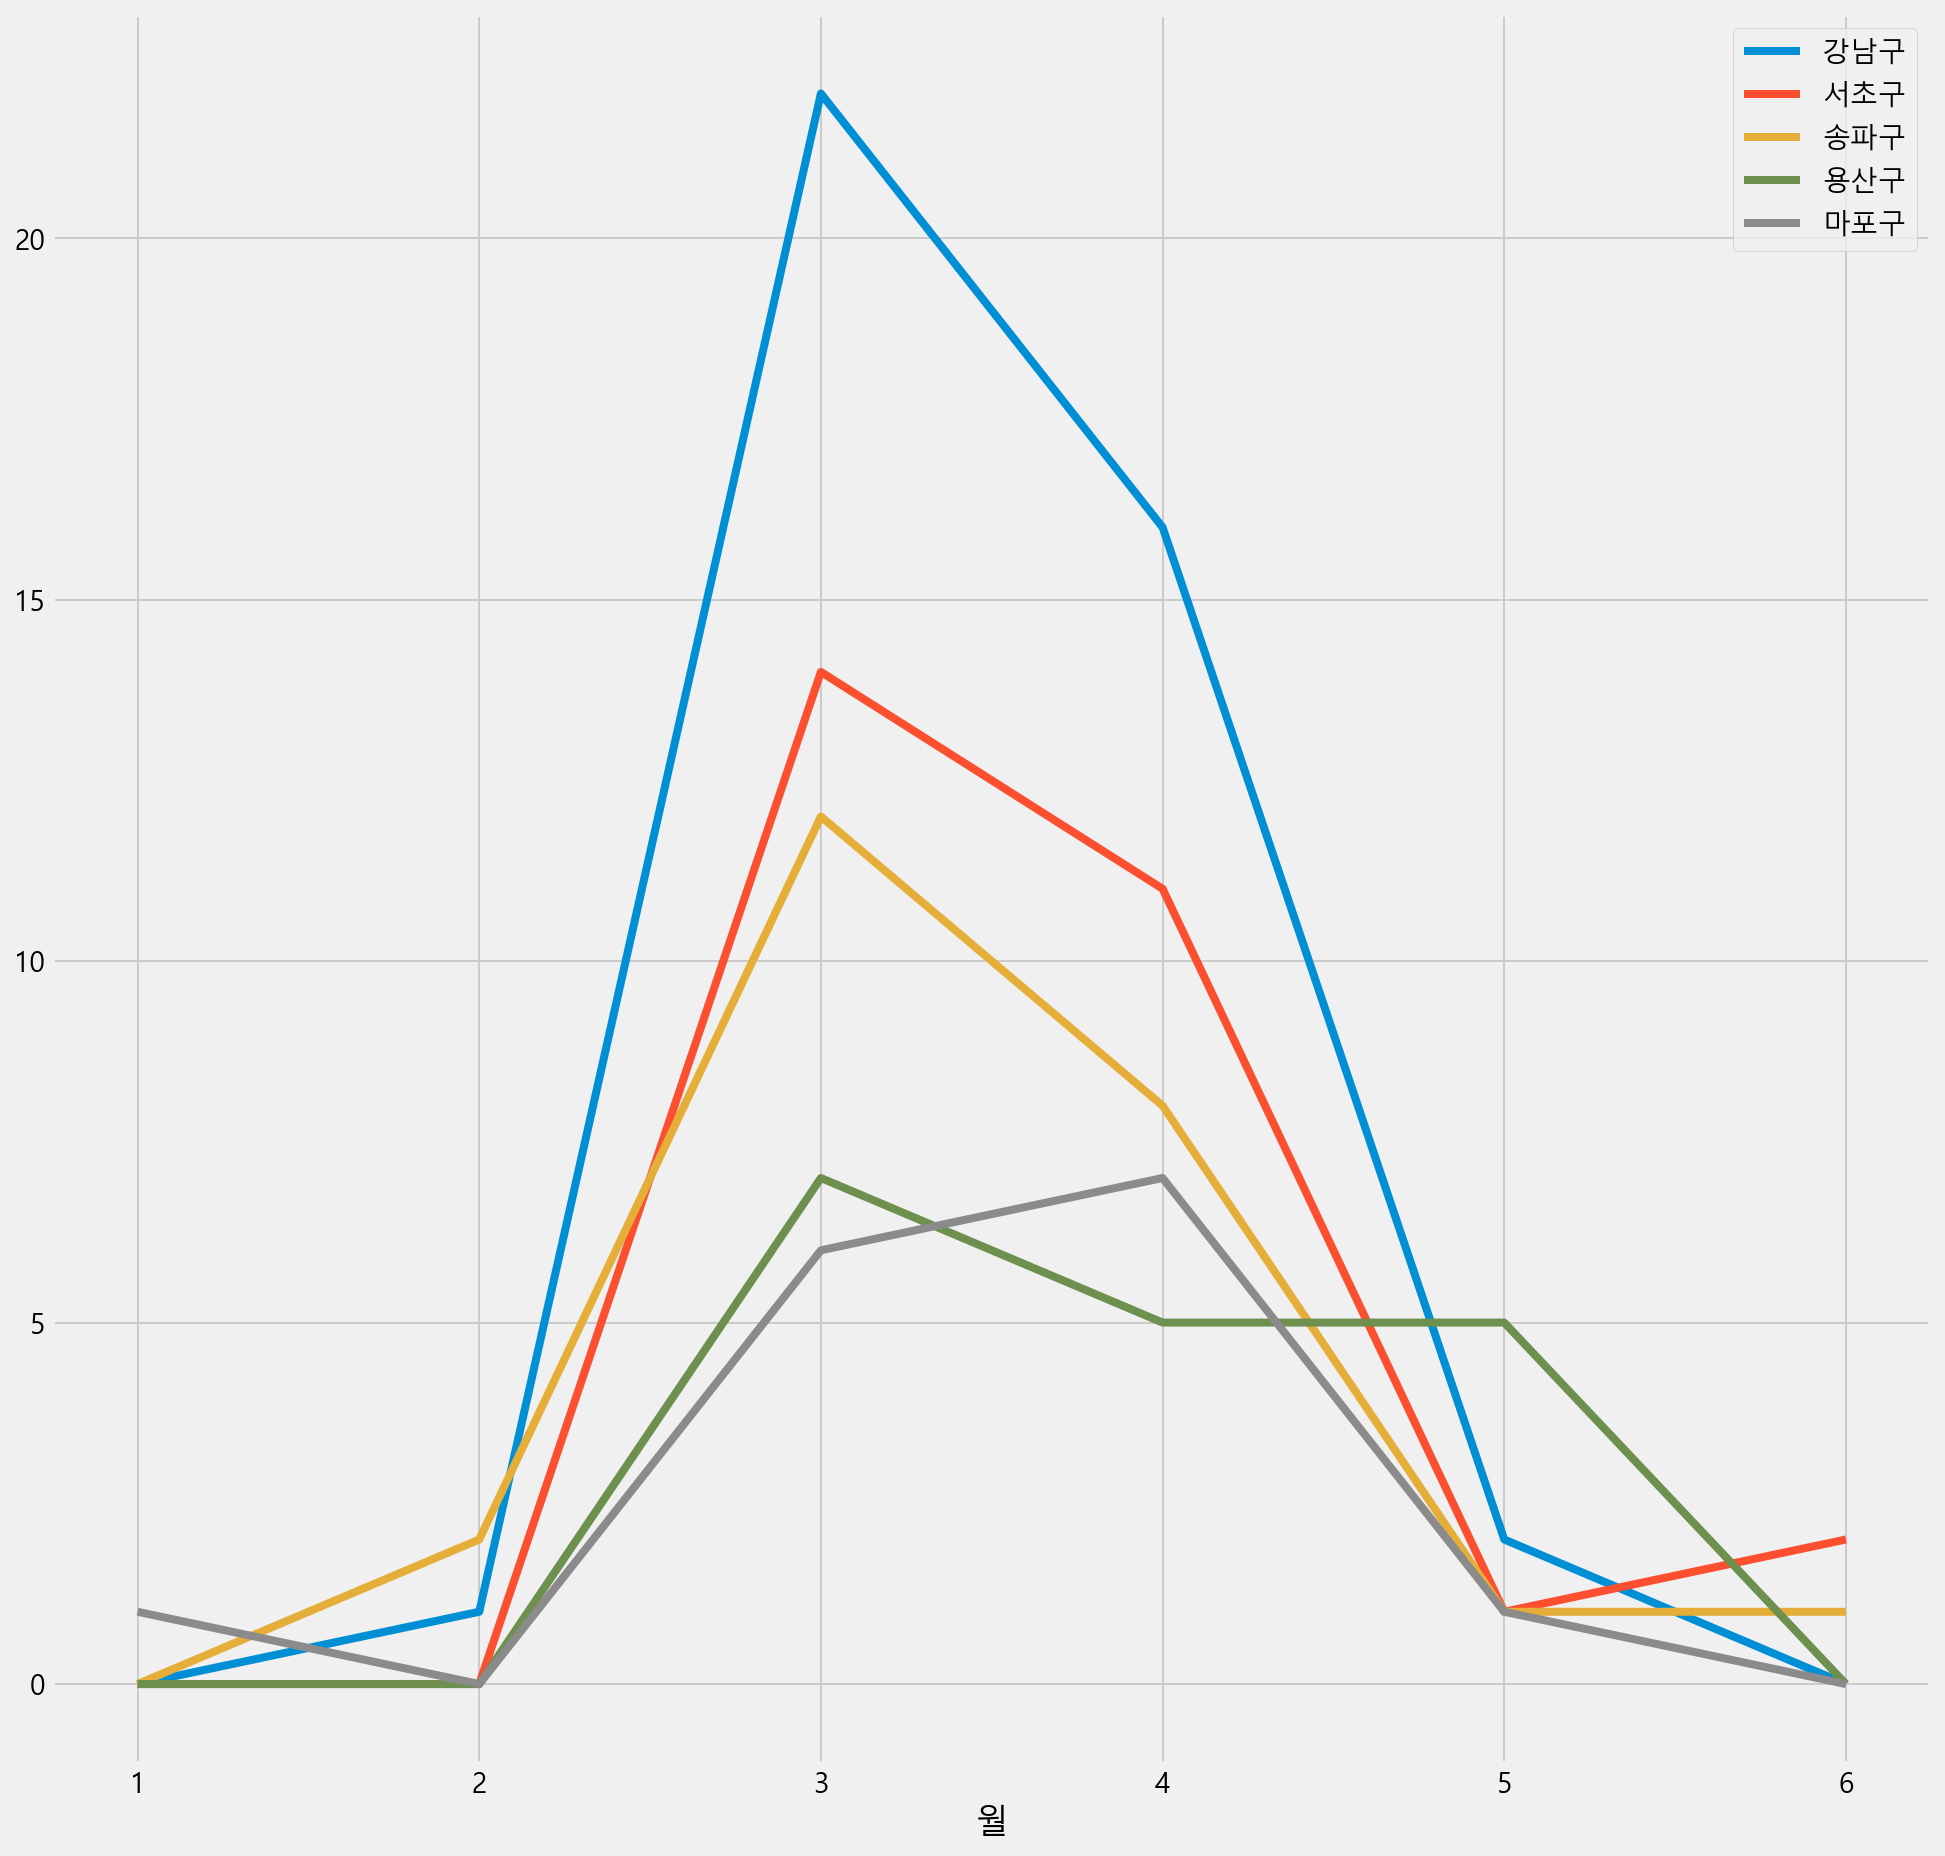

In [229]:
g = month_gu[top_oversea_gu].plot(figsize = (15,15))
g.legend(loc=1)

## 구별 해외유입 국가

In [237]:
group_oversea_gu = df_oversea.groupby(['거주지', '해외'])['연번'].count().unstack().fillna(0).astype(int)
group_oversea_gu.T

거주지,강남구,강동구,강북구,강서구,고양시,관악구,광진구,구로구,국외거주,금천구,...,용인시,은평구,인천시,재외국민,종로구,중구,중랑구,천안시,파주시,화성시
해외,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
남미,2,0,0,0,0,0,0,0,0,0,...,1,2,0,1,0,1,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,2,4,2,1,0,0,...,0,1,1,0,3,0,4,2,0,1
방글라데시,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
유럽,13,4,0,1,0,5,4,0,0,0,...,0,3,0,0,1,0,0,0,0,0


In [239]:
group_oversea_gu = df_oversea.pivot_table(index='해외', columns='거주지', values='연번', aggfunc='count', fill_value=0)
group_oversea_gu.style.background_gradient()

거주지,강남구,강동구,강북구,강서구,고양시,관악구,광진구,구로구,국외거주,금천구,기타,남양주,노원구,대전시,도봉구,동대문구,동작구,마포구,미국,서대문구,서초구,성남시,성동구,성북구,송파구,스페인,아산시,양천구,영등포구,용산구,용인시,은평구,인천시,재외국민,종로구,중구,중랑구,천안시,파주시,화성시
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
남미,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,1,1,0,1,0,1,0,0,0,0,0,1,2,0,1,0,1,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,2,4,2,1,0,0,1,1,2,0,3,2,3,5,1,3,16,2,9,6,11,0,0,3,2,4,0,1,1,0,3,0,4,2,0,1
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
유럽,13,4,0,1,0,5,4,0,0,0,0,0,4,1,5,2,5,4,0,4,10,0,2,4,8,4,0,0,5,5,0,3,0,0,1,0,0,0,0,0


In [246]:
# 강남 3구의 입국자는 주로 어디서 입국했나

group_oversea_gu.loc[['미국','유럽','남미','중국'],['강남구','서초구','송파구']]

거주지,강남구,서초구,송파구
해외,,,
미국,22,16,11
유럽,13,10,8
남미,2,1,1
중국,0,0,0


In [247]:
group_oversea_gu[top_oversea_gu]

거주지,강남구,서초구,송파구,용산구,마포구
해외,,,,,
UAE,0,0,1,0,0
남미,2,1,1,0,2
러시아,1,0,0,0,0
말레이시아,0,0,0,0,0
미국,22,16,11,4,5
방글라데시,1,0,0,0,0
베트남,0,0,0,0,0
싱가포르,0,0,1,0,0
유럽,13,10,8,5,4
